# PROBLEM STATEMENT

<b>PROJECT OBJECTIVE:</b> Design a DL based car identification model.

*italicized text*### MILESTONE 1

#### Step 1: Import the data.

In [1]:
"""
NOTE :
    During model run, There might be some issues like:
            "cannot identify image file %r" % (filename if filename else fp)
            PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000214A7DAE678>
    To resolve this use below command inside your environment:
    # pip install --upgrade Pillow  <-- https://github.com/ContinuumIO/anaconda-issues/issues/10737
    # uninstalling pillow installed using conda and re-installing using pip works
"""


'\nNOTE :\n    During model run, There might be some issues like:\n            "cannot identify image file %r" % (filename if filename else fp)\n            PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000214A7DAE678>\n    To resolve this use below command inside your environment:\n    # pip install --upgrade Pillow  <-- https://github.com/ContinuumIO/anaconda-issues/issues/10737\n    # uninstalling pillow installed using conda and re-installing using pip works\n'

In [2]:
!pip install --upgrade Pillow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing Libraries # A library is a collection of existing functions in python that can be used in your code
import numpy as np # NumPy is a Python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import pandas as pd # Pandas is an open-source library in Python that is made mainly for working with relational or labeled data
#both easily and intuitively.
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
#%matplotlib inline # %matplotlib inline command ensures that Matplotlib plots are displayed inline within the notebook, directly below the code cell
import seaborn as sns # Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates
#closely with pandas data structures. Seaborn helps you explore and understand your data.
import warnings
warnings.filterwarnings("ignore")

from PIL import Image #PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.
import cv2 #
import os #Python has a built-in os module with methods for interacting with the operating system, like creating files and directories, management of files
# and directories, input, output, environment variables, process management, etc.
import glob # The Python glob module is used to retrieve files or directories that match a specified pattern.
#It is part of the standard library, so it does not require any installation.
!pip install np_utils
#from tensorflow.keras.utils import np_utils
#from keras.utils.np_utils
from sklearn.model_selection import train_test_split

from keras.models import Sequential #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras.layers import Dense # Keras dense layer on the output layer performs dot product of input tensor and weight kernel matrix. A bias vector is added and element-wise activation is performed on output values.
from keras.layers import Dropout #Dropout layer Applies Dropout to the input. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/ (1 - rate) such that the sum over all inputs is unchanged.
from keras.layers import Flatten #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
#from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
#from keras.layers.convolutional import MaxPooling2D #Max pooling operation for 2D spatial data. Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
from keras.layers import BatchNormalization #atch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. Importantly, batch normalization works differently during training and during inference.
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger #The ModelCheckpoint callback class allows you to define where to checkpoint the model weights, how to name the file, and under what circumstances to make a checkpoint of the model.
# ReduceLROnPlateau callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator #The ImageDataGenerator class in Keras provides a suite of techniques for scaling pixel values in your image dataset prior to modeling.
import tensorflow as tf #software library for numerical computation using data flow graphs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=188bb3ce495ef04fcdca2fc9960d7146edf3a865503e3934d2be363cd46ac3ce
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [5]:
import zipfile #ZipFile is used to write and read the Zip files. It has some methods which are used to handle the Zip files.
import shutil #Shutil module offers high-level operation on a file like a copy, create, and remote operation on the file

In [6]:
from google.colab import drive
drive.mount('/content/drive/') #to interact with your Google Drive files

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
#Importing Train, test and car class data
df_CarClass = pd.read_csv('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Car+names+and+make.csv',header=None, names=['Car Class'])
df_TestAnnot = pd.read_csv('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Annotations/Test Annotation.csv')

df_TrainAnnot = pd.read_csv('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Annotations/Train Annotations.csv')

In [8]:
column_names = ['Image Name', 'X', 'Y', 'Width', 'Height', 'Image Class']
df_TestAnnot.columns = column_names
df_TrainAnnot.columns = column_names

In [9]:
#Printing car class data
df_CarClass
# We notice there are 196 rows / car classes

,Car Class
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
...,...
191,Volkswagen Beetle Hatchback 2012
192,Volvo C30 Hatchback 2012
193,Volvo 240 Sedan 1993
194,Volvo XC90 SUV 2007


In [10]:
#Printing Test Annotation data
df_TestAnnot
#We notice that there are 8040 test images

,Image Name,X,Y,Width,Height,Image Class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185
...,...,...,...,...,...,...
8036,08037.jpg,49,57,1169,669,63
8037,08038.jpg,23,18,640,459,16
8038,08039.jpg,33,27,602,252,17
8039,08040.jpg,33,142,521,376,38


In [11]:
#Printing Train annotation data
df_TrainAnnot
#We notice that there are 8144 test images

,Image Name,X,Y,Width,Height,Image Class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


In [12]:
'''# NO NEED TO EXECUTE THIS CODE AGAIN AS RESULT STORED INTO CSV
# Reading from zipfile and storing the image metadata in a data frame for train and test along images in array
# Tried importing images into dataframe - but abandoned it after it was taking too much memory - respective code has been commented
#import io
df_test_images = pd.DataFrame(columns=['Filename','Label','Folder','Filepath','FileShape'])
df_train_images = pd.DataFrame(columns=['Filename','Label','Folder','Filepath','FileShape'])

with zipfile.ZipFile('/content/drive/MyDrive/Car+Images.zip') as zf:
  for x in zf.namelist():
    #print(x)
    if x.endswith('.jpg') and 'Train' in x:
      with zf.open(x) as f:
        #print("Entered train loop")
        #imgs = f.namelist()
        img = Image.open(f)
        #plt.imshow(img)
        #img_data = img.convert('RGB')
        image_as_array = np.array(img,np.uint8)
        #print(image_as_array.shape)
        #print(image_as_array)
        #image = cv2.imdecode(image_as_array, cv2.IMREAD_COLOR)
        #train_images.append(image_as_array)
        #train_images_paths.append(x)
        #train_image_shapes.append(len(image_as_array.shape))
        tr1 = x.split('/')
        file_name = tr1[len(tr1)-1]
        label = tr1[len(tr1)-2]
        #df_temp = pd.DataFrame.from_dict({'Filename': file_name, 'Label': label, 'Image': [image_as_array],
                                                 # 'Folder': 'train','Filepath': x, 'FileShape': img.shape})
        #df_train_images['Filename'] = file_name
        #df_train_images['Label'] = label
        #X = image_as_array.reshape(-1, 3)
        #df_train_images['Image'].append(pd.Series([image_as_array]))
        #df_train_images['Folder'] = 'train'
        #df_train_images['Filepath'] = x
        #df_train_images['FileShape'] = [image_as_array.shape]
        #print(df_train_images)
        df_train_images = df_train_images.append({
                  'Filename': file_name,
                  'Label': label,
                  'Folder': 'train',
                  'Filepath': x,
                  'FileShape': image_as_array.shape
              }, ignore_index=True)

    if x.endswith('.jpg') and 'Test' in x:
      with zf.open(x) as f:
        img = Image.open(f)
        image_as_array = np.array(img, np.uint8)
        #test_images.append(image_as_array)
        #test_images_paths.append(x)
        #test_image_shapes.append(len(image_as_array.shape))
        tr1 = x.split('/')
        file_name = tr1[len(tr1)-1]
        label = tr1[len(tr1)-2]
        #df_test_images = df_test_images.append({'Filename': file_name, 'Label': label, 'Image': image_as_array,
                                                #'Folder': 'test'}, ignore_index=True)
        #df_temp = pd.DataFrame.from_dict({'Filename': file_name, 'Label': label, 'Image': [image_as_array],
                                                  #'Folder': 'train','Filepath': x, 'FileShape': img.shape})
        #df_temp.to_csv("/content/drive/MyDrive/df_test_images.csv",mode="a",header=False,index=False)
        df_test_images = df_test_images.append({
            'Filename': file_name,
            'Label': label,
            'Folder': 'test',
            'Filepath': x,
            'FileShape': image_as_array.shape}, ignore_index=True)

#Saving data frames into csv for easier execution next time
#df_train_images.to_csv("/content/drive/MyDrive/df_train_images.csv",mode="a",header=False,index=False)
#df_test_images.to_csv("/content/drive/MyDrive/df_train_images.csv",mode="a",header=False,index=False)
df_train_images.to_csv("/content/drive/MyDrive/df_train_images.csv",index=False)
df_test_images.to_csv("/content/drive/MyDrive/df_test_images.csv",index=False)'''

'# NO NEED TO EXECUTE THIS CODE AGAIN AS RESULT STORED INTO CSV\n# Reading from zipfile and storing the image metadata in a data frame for train and test along images in array\n# Tried importing images into dataframe - but abandoned it after it was taking too much memory - respective code has been commented\n#import io\ndf_test_images = pd.DataFrame(columns=[\'Filename\',\'Label\',\'Folder\',\'Filepath\',\'FileShape\'])\ndf_train_images = pd.DataFrame(columns=[\'Filename\',\'Label\',\'Folder\',\'Filepath\',\'FileShape\'])\n\nwith zipfile.ZipFile(\'/content/drive/MyDrive/Car+Images.zip\') as zf:\n  for x in zf.namelist():\n    #print(x)\n    if x.endswith(\'.jpg\') and \'Train\' in x:\n      with zf.open(x) as f:\n        #print("Entered train loop")\n        #imgs = f.namelist()\n        img = Image.open(f)\n        #plt.imshow(img)\n        #img_data = img.convert(\'RGB\')\n        image_as_array = np.array(img,np.uint8)\n        #print(image_as_array.shape)\n        #print(image_as_a

In [13]:
df_test_images = pd.read_csv('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/test_8041_images.csv')
df_train_images = pd.read_csv('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/train_8144_images.csv')

In [14]:
df_train_images
# Metadata for 8144 training images is imported along with file shape

,Unnamed: 0,Label,File,ModelYear,car_Model,Image_Name,xmin,ymin,xmax,ymax,Class,Height,Width,imageAsArray
0,0,Volvo 240 Sedan 1993,02344.jpg,1993,Volvo 240 Sedan,02344.jpg,614,9,1279,329,194,329,1279,[[[255 234 193]\n [253 231 190]\n [250 226 1...
1,1,Volvo 240 Sedan 1993,01431.jpg,1993,Volvo 240 Sedan,01431.jpg,17,158,779,462,194,533,800,[[[225 209 192]\n [226 210 193]\n [226 210 1...
2,2,Volvo 240 Sedan 1993,07067.jpg,1993,Volvo 240 Sedan,07067.jpg,284,291,1247,732,194,772,1279,[[[105 88 75]\n [ 91 74 61]\n [ 95 77 ...
3,3,Volvo 240 Sedan 1993,01853.jpg,1993,Volvo 240 Sedan,01853.jpg,270,320,999,763,194,768,1024,[[[136 154 183]\n [133 151 180]\n [131 149 1...
4,4,Volvo 240 Sedan 1993,05376.jpg,1993,Volvo 240 Sedan,05376.jpg,36,172,772,514,194,600,800,[[[126 121 130]\n [141 137 143]\n [138 134 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Volvo C30 Hatchback 2012,06111.jpg,2012,Volvo C30 Hatchback,06111.jpg,65,114,407,327,193,427,640,[[[ 2 4 4]\n [ 0 2 2]\n [ 0 2 ...
8140,8140,Volvo C30 Hatchback 2012,07373.jpg,2012,Volvo C30 Hatchback,07373.jpg,45,39,419,272,193,303,455,[[[ 27 29 40]\n [ 27 29 40]\n [ 26 28 ...
8141,8141,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,22,52,451,235,193,265,470,[[[ 2 0 1]\n [ 1 2 0]\n [ 0 0 ...
8142,8142,Volvo C30 Hatchback 2012,06442.jpg,2012,Volvo C30 Hatchback,06442.jpg,42,69,477,289,193,331,500,[[[20 37 86]\n [ 0 4 51]\n [ 0 4 48]\n .....


In [15]:
df_test_images
# Metadata for 8041 testing images is imported along with file shape

,Unnamed: 0,carName,imageName,carModel,carModel_1,Height,Width
0,0,Acura Integra Type R 2001,00130.jpg,2001,Acura Integra Type R,458,800
1,1,Acura Integra Type R 2001,01002.jpg,2001,Acura Integra Type R,823,551
2,2,Acura Integra Type R 2001,00128.jpg,2001,Acura Integra Type R,600,900
3,3,Acura Integra Type R 2001,01176.jpg,2001,Acura Integra Type R,1200,1600
4,4,Acura Integra Type R 2001,00565.jpg,2001,Acura Integra Type R,380,545
...,...,...,...,...,...,...,...
8036,8036,Toyota Sequoia SUV 2012,01743.jpg,2012,Toyota Sequoia SUV,480,640
8037,8037,Toyota Sequoia SUV 2012,07608.jpg,2012,Toyota Sequoia SUV,360,480
8038,8038,Toyota Sequoia SUV 2012,03426.jpg,2012,Toyota Sequoia SUV,480,640
8039,8039,Toyota Sequoia SUV 2012,06136.jpg,2012,Toyota Sequoia SUV,1575,2100


Performed below steps to import train and test images using ImageDataGenerator Class

In [16]:
# Need to install keras-preprocessing for ImageDataGenerator
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [17]:
data_dir = '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset'
data_dir_tmp = '/tmp/image_dataset'


In [18]:
'''#ONE TIME CODE: NO NEED TO EXECUTE THIS CODE AGAIN AS DATA IS ALREADY UNZIPPED
#unzipping given data file
import zipfile

with zipfile.ZipFile(data_dir + '.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir+data_dir_tmp)'''

"#ONE TIME CODE: NO NEED TO EXECUTE THIS CODE AGAIN AS DATA IS ALREADY UNZIPPED\n#unzipping given data file\nimport zipfile\n\nwith zipfile.ZipFile(data_dir + '.zip', 'r') as zip_ref:\n    zip_ref.extractall(data_dir+data_dir_tmp)"

In [19]:
# Use image data generator to import data for Train and test
# Reference: https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
from keras_preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

# load and iterate training dataset - by defeault loads 256 x 256 format
train_images = datagen.flow_from_directory(data_dir + '/Car Images/Train Images', class_mode='categorical', target_size=(224, 224), batch_size=64)
# load and iterate test dataset
test_images = datagen.flow_from_directory(data_dir  + '/Car Images/Test Images', class_mode='categorical', target_size=(224, 224), batch_size=64)

Found 8279 images belonging to 196 classes.
Found 8084 images belonging to 196 classes.


In [20]:
#Test the iterators
# confirm the iterator works
batchX, batchy = train_images.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
# We see that it has imported 64 images with 224,224,3 resolution

Batch shape=(64, 224, 224, 3), min=0.000, max=1.000


#### Step 2: Map training and testing images to its classes

In [21]:
# Convering training and testing Car class data to int
df_TrainAnnot['Image Class'] = df_TrainAnnot['Image Class'].astype(int)
df_TestAnnot['Image Class'] = df_TestAnnot['Image Class'].astype(int)

In [22]:
#Adding 1 to map to correct classes
df_CarClass['Image Class'] = df_CarClass.index+1

In [23]:
#Mapping training and testing images to its class
df_TrainAnnot = pd.merge(df_TrainAnnot,df_CarClass, left_on='Image Class',right_on='Image Class')
df_TestAnnot = pd.merge(df_TestAnnot,df_CarClass, left_on='Image Class',right_on='Image Class')

In [24]:
df_TrainAnnot

,Image Name,X,Y,Width,Height,Image Class,Car Class
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00017.jpg,39,52,233,150,14,Audi TTS Coupe 2012
2,00411.jpg,52,47,586,260,14,Audi TTS Coupe 2012
3,00467.jpg,47,92,209,178,14,Audi TTS Coupe 2012
4,00888.jpg,7,51,253,156,14,Audi TTS Coupe 2012
...,...,...,...,...,...,...,...
8139,07074.jpg,33,33,605,376,78,Chrysler Town and Country Minivan 2012
8140,07104.jpg,41,79,593,355,78,Chrysler Town and Country Minivan 2012
8141,07123.jpg,95,39,322,230,78,Chrysler Town and Country Minivan 2012
8142,07326.jpg,207,387,1446,835,78,Chrysler Town and Country Minivan 2012


In [25]:
df_TestAnnot

,Image Name,X,Y,Width,Height,Image Class,Car Class
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007
1,00055.jpg,84,169,561,443,181,Suzuki Aerio Sedan 2007
2,00323.jpg,12,31,489,226,181,Suzuki Aerio Sedan 2007
3,00540.jpg,7,121,635,357,181,Suzuki Aerio Sedan 2007
4,00541.jpg,9,42,282,207,181,Suzuki Aerio Sedan 2007
...,...,...,...,...,...,...,...
8036,06464.jpg,23,73,430,278,77,Chrysler Sebring Convertible 2010
8037,06484.jpg,36,218,522,467,77,Chrysler Sebring Convertible 2010
8038,07046.jpg,24,63,336,235,77,Chrysler Sebring Convertible 2010
8039,07596.jpg,19,30,417,194,77,Chrysler Sebring Convertible 2010


#### Step 3: Map training and testing images to its annotations.

In [26]:
#Mapped traing data to annotations
mapped_train = pd.merge(df_TrainAnnot ,df_train_images, left_on=['Image Name'],right_on=['File'])

In [27]:
mapped_train

,Image Name,X,Y,Width_x,Height_x,Image Class,Car Class,Unnamed: 0,Label,File,...,car_Model,Image_Name,xmin,ymin,xmax,ymax,Class,Height_y,Width_y,imageAsArray
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,1274,Audi TTS Coupe 2012,00001.jpg,...,Audi TTS Coupe,00001.jpg,39,116,569,375,14,400,600,[[[123 119 101]\n [120 116 98]\n [115 111 ...
1,00017.jpg,39,52,233,150,14,Audi TTS Coupe 2012,1311,Audi TTS Coupe 2012,00017.jpg,...,Audi TTS Coupe,00017.jpg,39,52,233,150,14,194,259,[[[127 103 115]\n [104 80 92]\n [111 87 ...
2,00411.jpg,52,47,586,260,14,Audi TTS Coupe 2012,1303,Audi TTS Coupe 2012,00411.jpg,...,Audi TTS Coupe,00411.jpg,52,47,586,260,14,330,600,[[[212 210 210]\n [201 199 199]\n [211 209 2...
3,00467.jpg,47,92,209,178,14,Audi TTS Coupe 2012,1282,Audi TTS Coupe 2012,00467.jpg,...,Audi TTS Coupe,00467.jpg,47,92,209,178,14,194,259,[[[241 242 233]\n [246 247 238]\n [252 253 2...
4,00888.jpg,7,51,253,156,14,Audi TTS Coupe 2012,1297,Audi TTS Coupe 2012,00888.jpg,...,Audi TTS Coupe,00888.jpg,7,51,253,156,14,194,259,[[[244 244 244]\n [244 244 244]\n [244 244 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,07074.jpg,33,33,605,376,78,Chrysler Town and Country Minivan 2012,3069,Chrysler Town and Country Minivan 2012,07074.jpg,...,Chrysler Town and Country Minivan,07074.jpg,33,33,605,376,78,427,640,[[[182 178 167]\n [183 179 168]\n [184 180 1...
8140,07104.jpg,41,79,593,355,78,Chrysler Town and Country Minivan 2012,3047,Chrysler Town and Country Minivan 2012,07104.jpg,...,Chrysler Town and Country Minivan,07104.jpg,41,79,593,355,78,384,630,[[[ 77 84 101]\n [ 79 86 103]\n [ 76 83 1...
8141,07123.jpg,95,39,322,230,78,Chrysler Town and Country Minivan 2012,3049,Chrysler Town and Country Minivan 2012,07123.jpg,...,Chrysler Town and Country Minivan,07123.jpg,95,39,322,230,78,266,400,[[[ 50 56 55]\n [ 58 64 63]\n [ 53 60 ...
8142,07326.jpg,207,387,1446,835,78,Chrysler Town and Country Minivan 2012,3066,Chrysler Town and Country Minivan 2012,07326.jpg,...,Chrysler Town and Country Minivan,07326.jpg,207,387,1446,835,78,1067,1600,[[[205 187 176]\n [205 187 176]\n [205 187 1...


In [28]:
#Mapped testing data to annotations
mapped_test = pd.merge(df_TestAnnot,df_test_images, left_on=['Image Name'],right_on=['imageName'])

In [29]:
mapped_test

,Image Name,X,Y,Width_x,Height_x,Image Class,Car Class,Unnamed: 0,carName,imageName,carModel,carModel_1,Height_y,Width_y
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007,7710,Suzuki Aerio Sedan 2007,00001.jpg,2007,Suzuki Aerio Sedan,182,276
1,00055.jpg,84,169,561,443,181,Suzuki Aerio Sedan 2007,7706,Suzuki Aerio Sedan 2007,00055.jpg,2007,Suzuki Aerio Sedan,480,640
2,00323.jpg,12,31,489,226,181,Suzuki Aerio Sedan 2007,7705,Suzuki Aerio Sedan 2007,00323.jpg,2007,Suzuki Aerio Sedan,238,499
3,00540.jpg,7,121,635,357,181,Suzuki Aerio Sedan 2007,7709,Suzuki Aerio Sedan 2007,00540.jpg,2007,Suzuki Aerio Sedan,480,640
4,00541.jpg,9,42,282,207,181,Suzuki Aerio Sedan 2007,7708,Suzuki Aerio Sedan 2007,00541.jpg,2007,Suzuki Aerio Sedan,255,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,06464.jpg,23,73,430,278,77,Chrysler Sebring Convertible 2010,3258,Chrysler Sebring Convertible 2010,06464.jpg,2010,Chrysler Sebring Convertible,304,450
8037,06484.jpg,36,218,522,467,77,Chrysler Sebring Convertible 2010,3289,Chrysler Sebring Convertible 2010,06484.jpg,2010,Chrysler Sebring Convertible,480,640
8038,07046.jpg,24,63,336,235,77,Chrysler Sebring Convertible 2010,3276,Chrysler Sebring Convertible 2010,07046.jpg,2010,Chrysler Sebring Convertible,263,350
8039,07596.jpg,19,30,417,194,77,Chrysler Sebring Convertible 2010,3288,Chrysler Sebring Convertible 2010,07596.jpg,2010,Chrysler Sebring Convertible,221,441


#### Step 4: Display images with bounding box and perform EDA

In [30]:
# Creating a function to display random images with bounding box

# Creating a function to display random images with bounding box

def display_bounded_images(df,number):
    random_df = df.sample(number) #This will pick a random number of samples from the dataframe
    fig, ax = plt.subplots(number, 2, figsize=(10,10)) #Creating subplots to display  multiple images
    i = 0
    for index, row in random_df.iterrows(): #Iterating through the rows to show image and it species
        print(i)
        # Check if the required columns exist before accessing them
        if 'X' in df.columns and 'Y' in df.columns and 'Width' in df.columns and 'Height' in df.columns:
            x = row['X']
            y = row['Y']
            w = row['Width']
            h = row['Height']
        else:
            print("Error: Missing bounding box columns ('X', 'Y', 'Width', 'Height') in the dataframe.")
            return # Exit the function if columns are missing

        img_path = row['Filepath']
        print(img_path)
        print(data_dir + data_dir_tmp + '/'+ img_path)
        image = cv2.imread(data_dir + data_dir_tmp + '/'+ img_path)
        ax[i,0].imshow(image)
        ax[i,0].set_title(row['Label']+'Without bounding box') #Reading Label
        #image = np.asarray(row['Image'])
        #print(image)
        #image = (image / 255 ).astype(np.float32)
        #print(image)
        #plt.imshow(image)
        bounded_img = cv2.rectangle(image, (x,y), (w,h), (255,255,255), thickness=2)
        ax[i,1].imshow(bounded_img) #Reading the image stored in array
        ax[i,1].set_title(row['Label']+'With bounding box') #Reading Label
        i=i+1
    plt.show() #Showing the final subplot

0
Error: Missing bounding box columns ('X', 'Y', 'Width', 'Height') in the dataframe.


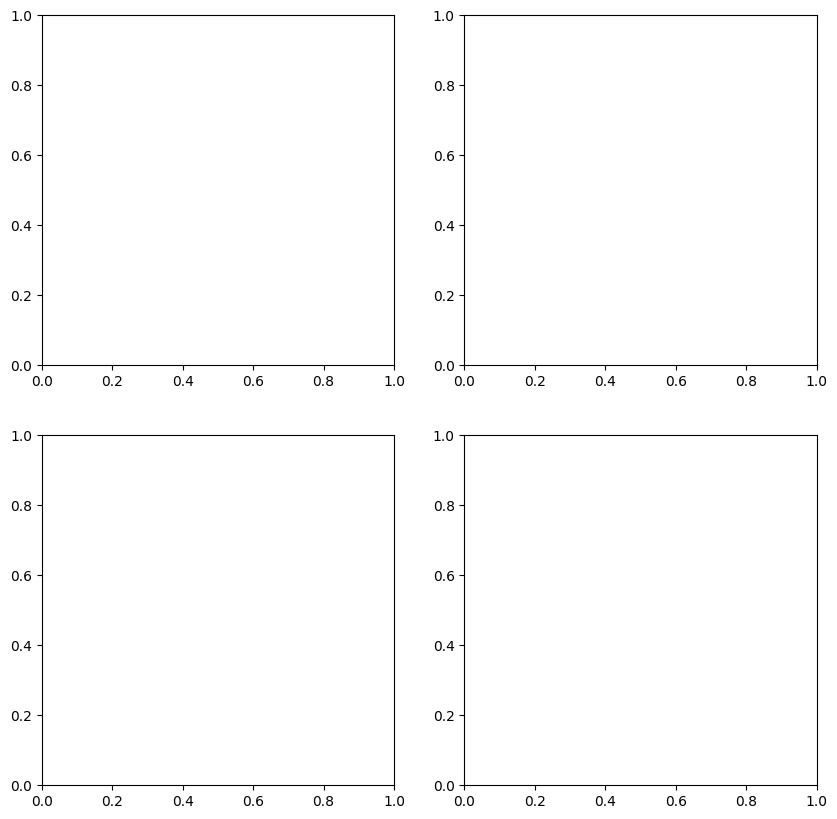

In [31]:


display_bounded_images(mapped_train,2)

0
Error: Missing bounding box columns ('X', 'Y', 'Width', 'Height') in the dataframe.


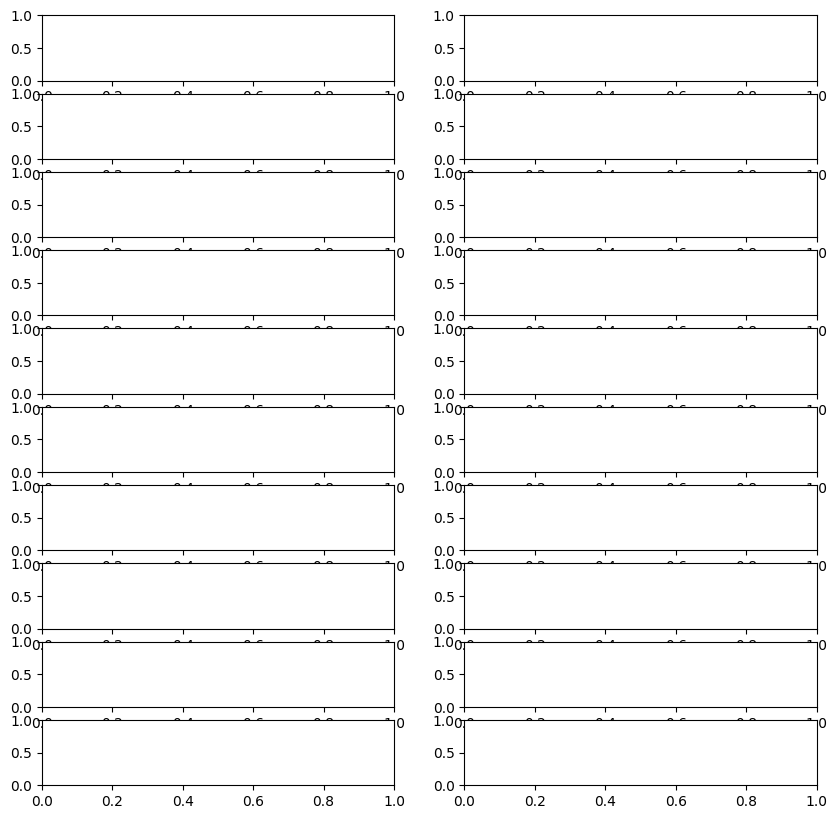

In [32]:
display_bounded_images(mapped_test,10)

##### EDA Analysis

In [33]:
# Merging the train and test datasets into one
new_df = [mapped_train,mapped_test]

In [34]:
merged_df = pd.concat(new_df)

In [35]:
#merged_df has train and test data combined
merged_df.shape

(16185, 25)

In [36]:
merged_df.head(10)

,Image Name,X,Y,Width_x,Height_x,Image Class,Car Class,Unnamed: 0,Label,File,...,xmax,ymax,Class,Height_y,Width_y,imageAsArray,carName,imageName,carModel,carModel_1
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,1274,Audi TTS Coupe 2012,00001.jpg,...,569.0,375.0,14.0,400,600,[[[123 119 101]\n [120 116 98]\n [115 111 ...,NaN,NaN,NaN,NaN
1,00017.jpg,39,52,233,150,14,Audi TTS Coupe 2012,1311,Audi TTS Coupe 2012,00017.jpg,...,233.0,150.0,14.0,194,259,[[[127 103 115]\n [104 80 92]\n [111 87 ...,NaN,NaN,NaN,NaN
2,00411.jpg,52,47,586,260,14,Audi TTS Coupe 2012,1303,Audi TTS Coupe 2012,00411.jpg,...,586.0,260.0,14.0,330,600,[[[212 210 210]\n [201 199 199]\n [211 209 2...,NaN,NaN,NaN,NaN
3,00467.jpg,47,92,209,178,14,Audi TTS Coupe 2012,1282,Audi TTS Coupe 2012,00467.jpg,...,209.0,178.0,14.0,194,259,[[[241 242 233]\n [246 247 238]\n [252 253 2...,NaN,NaN,NaN,NaN
4,00888.jpg,7,51,253,156,14,Audi TTS Coupe 2012,1297,Audi TTS Coupe 2012,00888.jpg,...,253.0,156.0,14.0,194,259,[[[244 244 244]\n [244 244 244]\n [244 244 2...,NaN,NaN,NaN,NaN
5,01085.jpg,90,53,460,257,14,Audi TTS Coupe 2012,1300,Audi TTS Coupe 2012,01085.jpg,...,460.0,257.0,14.0,334,500,[[[ 24 24 24]\n [ 14 14 14]\n [ 22 22 ...,NaN,NaN,NaN,NaN
6,01210.jpg,19,123,618,354,14,Audi TTS Coupe 2012,1299,Audi TTS Coupe 2012,01210.jpg,...,618.0,354.0,14.0,480,640,[[[185 130 125]\n [185 130 125]\n [185 130 1...,NaN,NaN,NaN,NaN
7,01232.jpg,150,87,472,289,14,Audi TTS Coupe 2012,1301,Audi TTS Coupe 2012,01232.jpg,...,472.0,289.0,14.0,400,600,[[[117 141 131]\n [112 136 126]\n [108 132 1...,NaN,NaN,NaN,NaN
8,01403.jpg,16,41,399,300,14,Audi TTS Coupe 2012,1294,Audi TTS Coupe 2012,01403.jpg,...,399.0,300.0,14.0,360,424,[[[255 255 255]\n [255 255 255]\n [255 255 2...,NaN,NaN,NaN,NaN
9,01880.jpg,120,324,890,731,14,Audi TTS Coupe 2012,1302,Audi TTS Coupe 2012,01880.jpg,...,890.0,731.0,14.0,768,1024,[[[186 188 182]\n [186 188 182]\n [185 187 1...,NaN,NaN,NaN,NaN


In [37]:
# Creating a function to split the car make, type and year from label and creating separate columns for them

# Creating a function to split the car make, type and year from label and creating separate columns for them

def split_label(row):
    label = row['Label']
    if isinstance(label, str):  # Check if label is a string
        labels = label.split()
        car_make = labels[0]
        make_year = labels[len(labels)-1]
        car_type = labels[len(labels)-2]
        string_to_remove = [car_make,make_year,car_type]
        car_model = label
        for string in string_to_remove:
            car_model = car_model.replace(string, '')
        return pd.Series(dict(car_make=car_make, make_year=make_year, car_type=car_type, car_model = car_model))
    else:
        # Handle cases where 'Label' is not a string (e.g., return empty values)
        return pd.Series(dict(car_make=None, make_year=None, car_type=None, car_model=None))

In [38]:
#merged_df1 has expand label expanded into make, model etc.
merged_df1 = pd.concat([merged_df, merged_df.apply(split_label,axis=1)], axis=1)

In [39]:
#function to conver resolution strong into list
def convert_to_set(input_string):
  values = input_string.strip('()').split(',')
  #print(values)
  result_list = list(map(int, values))
  return result_list

In [40]:
#Example rune
print(convert_to_set('(300,300,5)'))

[300, 300, 5]


In [41]:
# Verify if 'FileShape' column exists
if 'FileShape' in merged_df1.columns:
    merged_df1["FileShape"] = merged_df1["FileShape"].apply(convert_to_set)
else:
    print("Column 'FileShape' not found in the DataFrame.")
    # Investigate why the column is missing and potentially recreate it if necessary

Column 'FileShape' not found in the DataFrame.


In [42]:
merged_df1.head(10)

,Image Name,X,Y,Width_x,Height_x,Image Class,Car Class,Unnamed: 0,Label,File,...,Width_y,imageAsArray,carName,imageName,carModel,carModel_1,car_make,make_year,car_type,car_model
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,1274,Audi TTS Coupe 2012,00001.jpg,...,600,[[[123 119 101]\n [120 116 98]\n [115 111 ...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
1,00017.jpg,39,52,233,150,14,Audi TTS Coupe 2012,1311,Audi TTS Coupe 2012,00017.jpg,...,259,[[[127 103 115]\n [104 80 92]\n [111 87 ...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
2,00411.jpg,52,47,586,260,14,Audi TTS Coupe 2012,1303,Audi TTS Coupe 2012,00411.jpg,...,600,[[[212 210 210]\n [201 199 199]\n [211 209 2...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
3,00467.jpg,47,92,209,178,14,Audi TTS Coupe 2012,1282,Audi TTS Coupe 2012,00467.jpg,...,259,[[[241 242 233]\n [246 247 238]\n [252 253 2...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
4,00888.jpg,7,51,253,156,14,Audi TTS Coupe 2012,1297,Audi TTS Coupe 2012,00888.jpg,...,259,[[[244 244 244]\n [244 244 244]\n [244 244 2...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
5,01085.jpg,90,53,460,257,14,Audi TTS Coupe 2012,1300,Audi TTS Coupe 2012,01085.jpg,...,500,[[[ 24 24 24]\n [ 14 14 14]\n [ 22 22 ...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
6,01210.jpg,19,123,618,354,14,Audi TTS Coupe 2012,1299,Audi TTS Coupe 2012,01210.jpg,...,640,[[[185 130 125]\n [185 130 125]\n [185 130 1...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
7,01232.jpg,150,87,472,289,14,Audi TTS Coupe 2012,1301,Audi TTS Coupe 2012,01232.jpg,...,600,[[[117 141 131]\n [112 136 126]\n [108 132 1...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
8,01403.jpg,16,41,399,300,14,Audi TTS Coupe 2012,1294,Audi TTS Coupe 2012,01403.jpg,...,424,[[[255 255 255]\n [255 255 255]\n [255 255 2...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS
9,01880.jpg,120,324,890,731,14,Audi TTS Coupe 2012,1302,Audi TTS Coupe 2012,01880.jpg,...,1024,[[[186 188 182]\n [186 188 182]\n [185 187 1...,NaN,NaN,NaN,NaN,Audi,2012,Coupe,TTS


In [43]:
merged_df1['car_make'].value_counts()

car_make
Chevrolet        905
Dodge            630
Audi             589
BMW              531
Ford             521
Hyundai          438
Mercedes-Benz    261
Chrysler         260
Acura            242
GMC              238
Bentley          238
Jeep             220
Nissan           171
Toyota           168
Suzuki           167
Ferrari          164
Honda            161
Lamborghini      161
Buick            158
Aston            157
Volkswagen       132
Volvo            131
Cadillac         129
Rolls-Royce      114
Spyker            88
Land              86
HUMMER            83
Bugatti           77
Infiniti          67
FIAT              62
Mitsubishi        48
Jaguar            47
Eagle             46
Daewoo            45
Geo               45
AM                45
McLaren           44
Porsche           44
Fisker            44
Plymouth          44
Scion             42
Ram               41
smart             40
Isuzu             40
Tesla             39
Lincoln           39
MINI              37
Mazd

##### Horizontal Bar Plots for visualization for car make, type, year and class

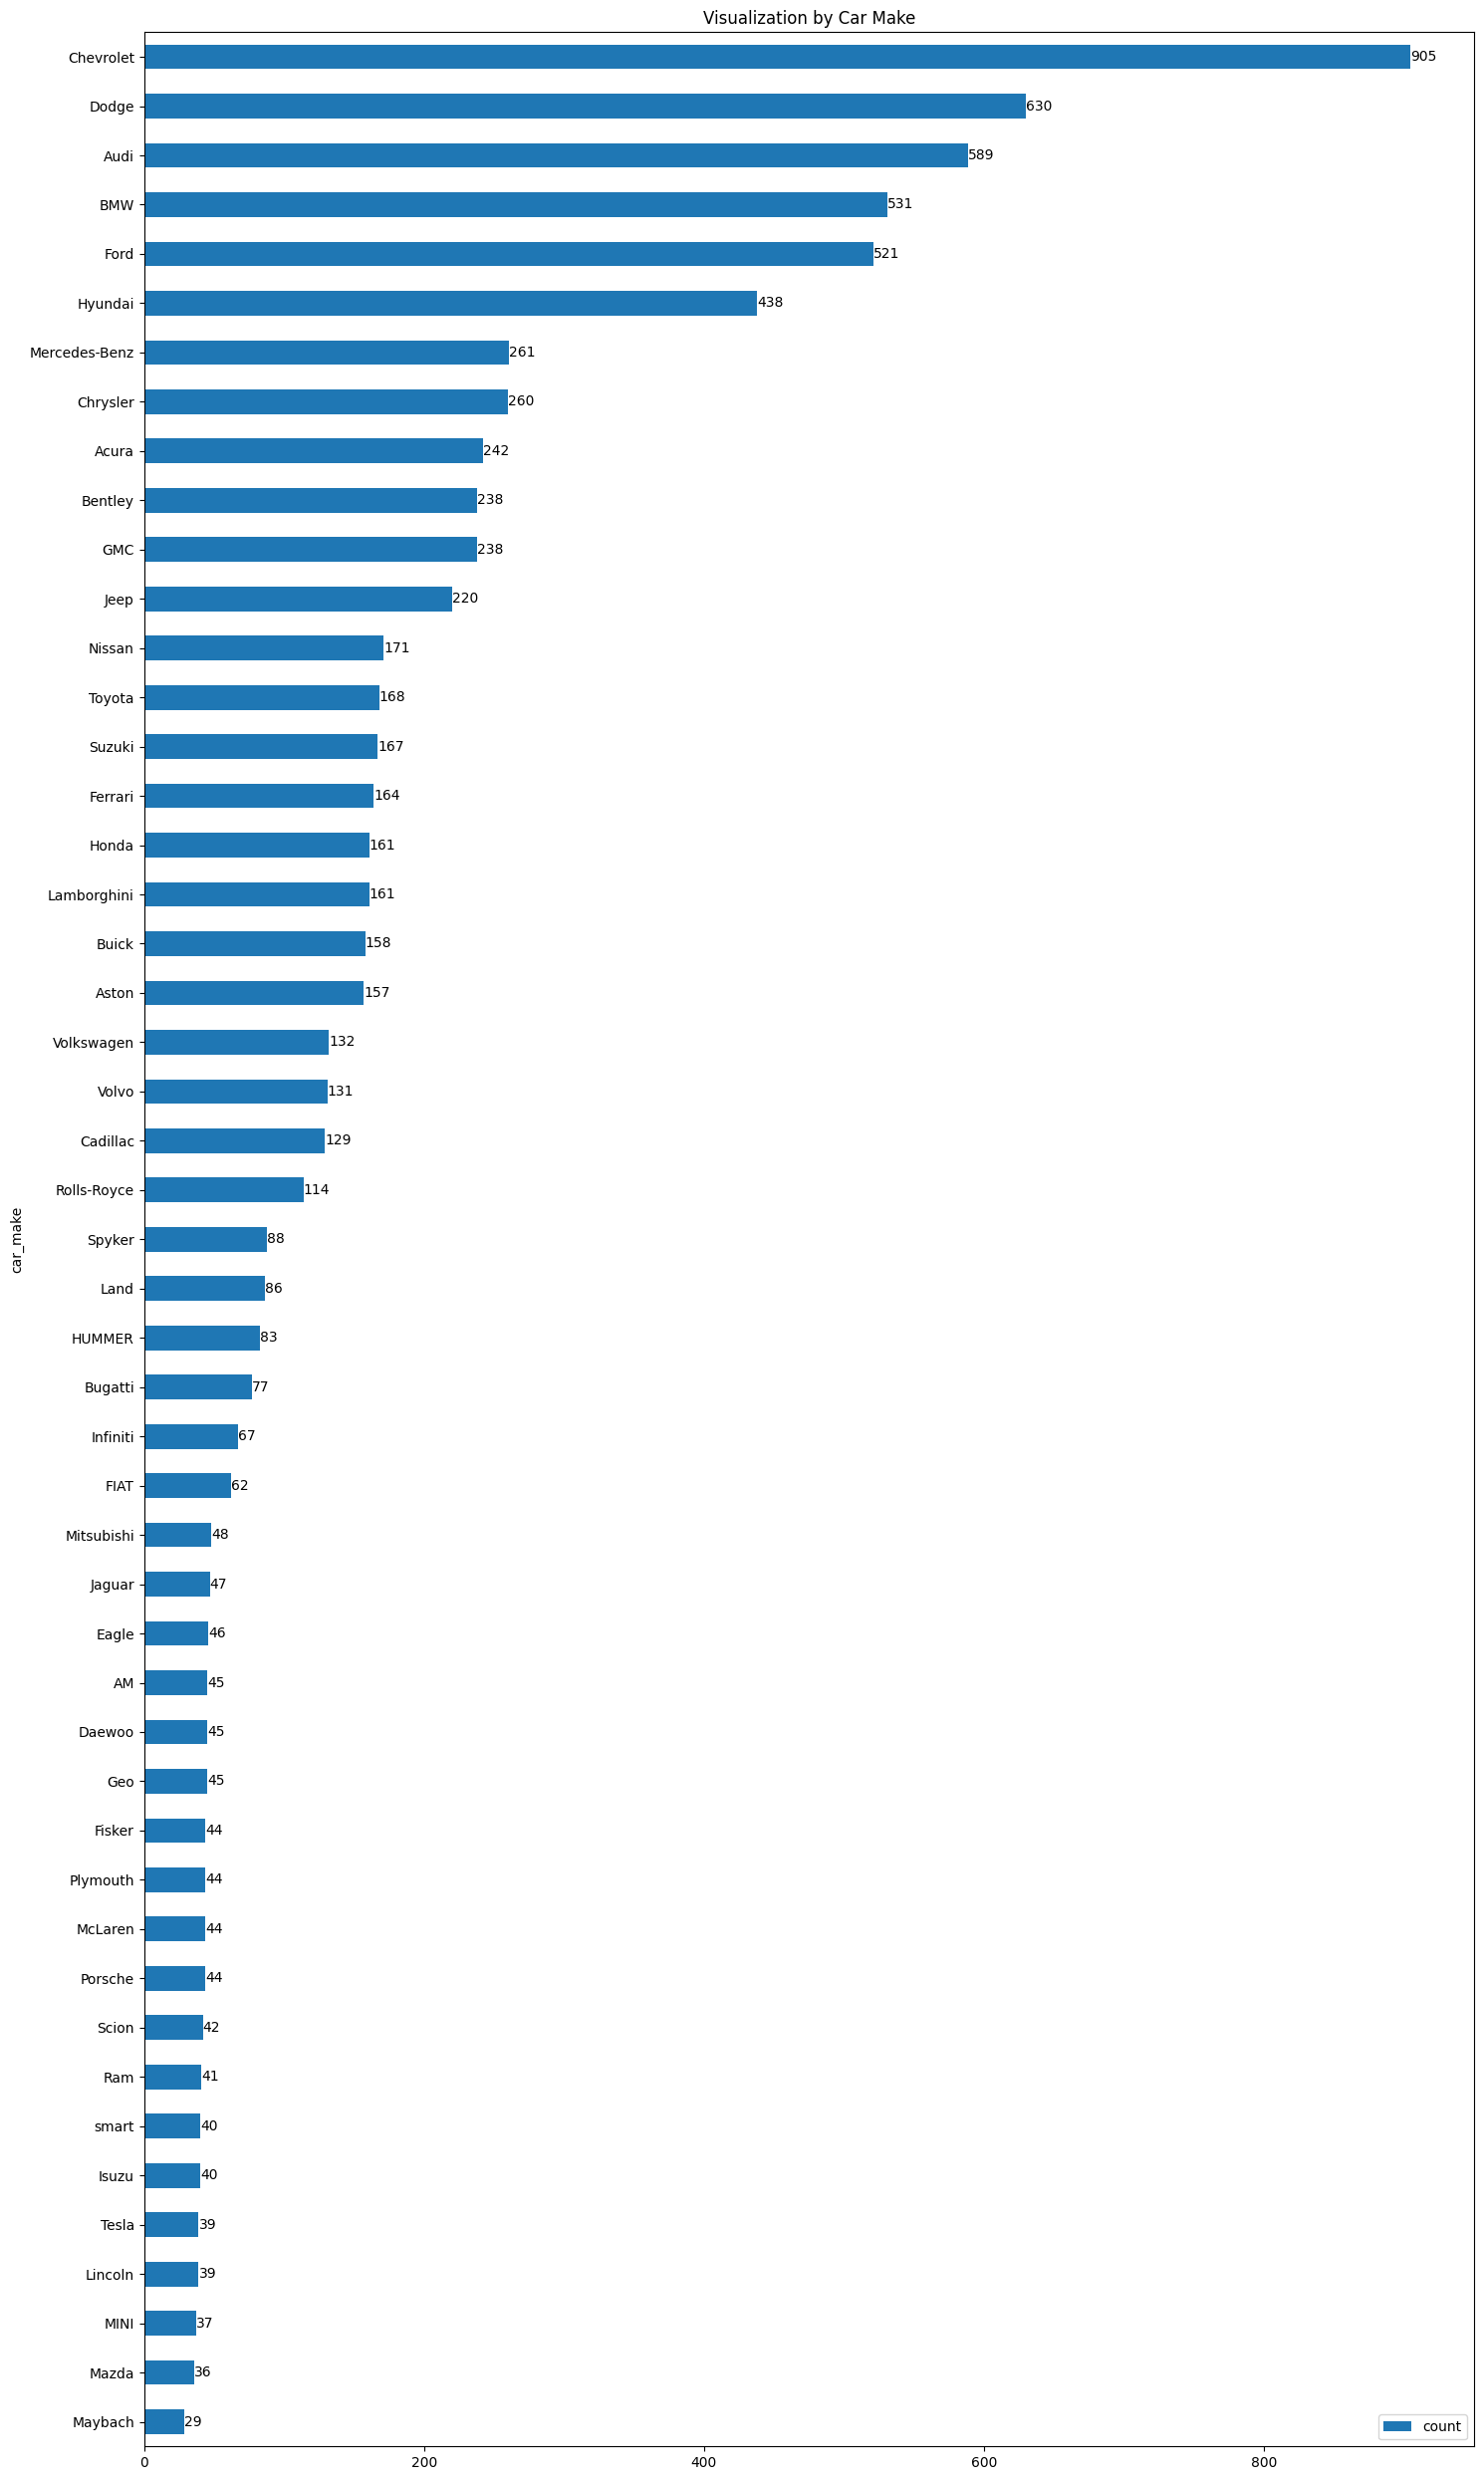

In [44]:
ax = merged_df1.car_make.value_counts().sort_values().plot(kind='barh', figsize=(15, 25),
                                                      title='Visualization by Car Make', legend=True)

ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

<b>Observations:</b>

>***Chevrolet, Audi, BMW, Dodge and Ford are the top 5 car makers as per the above plot whereas Maybach and Mazda are the least***

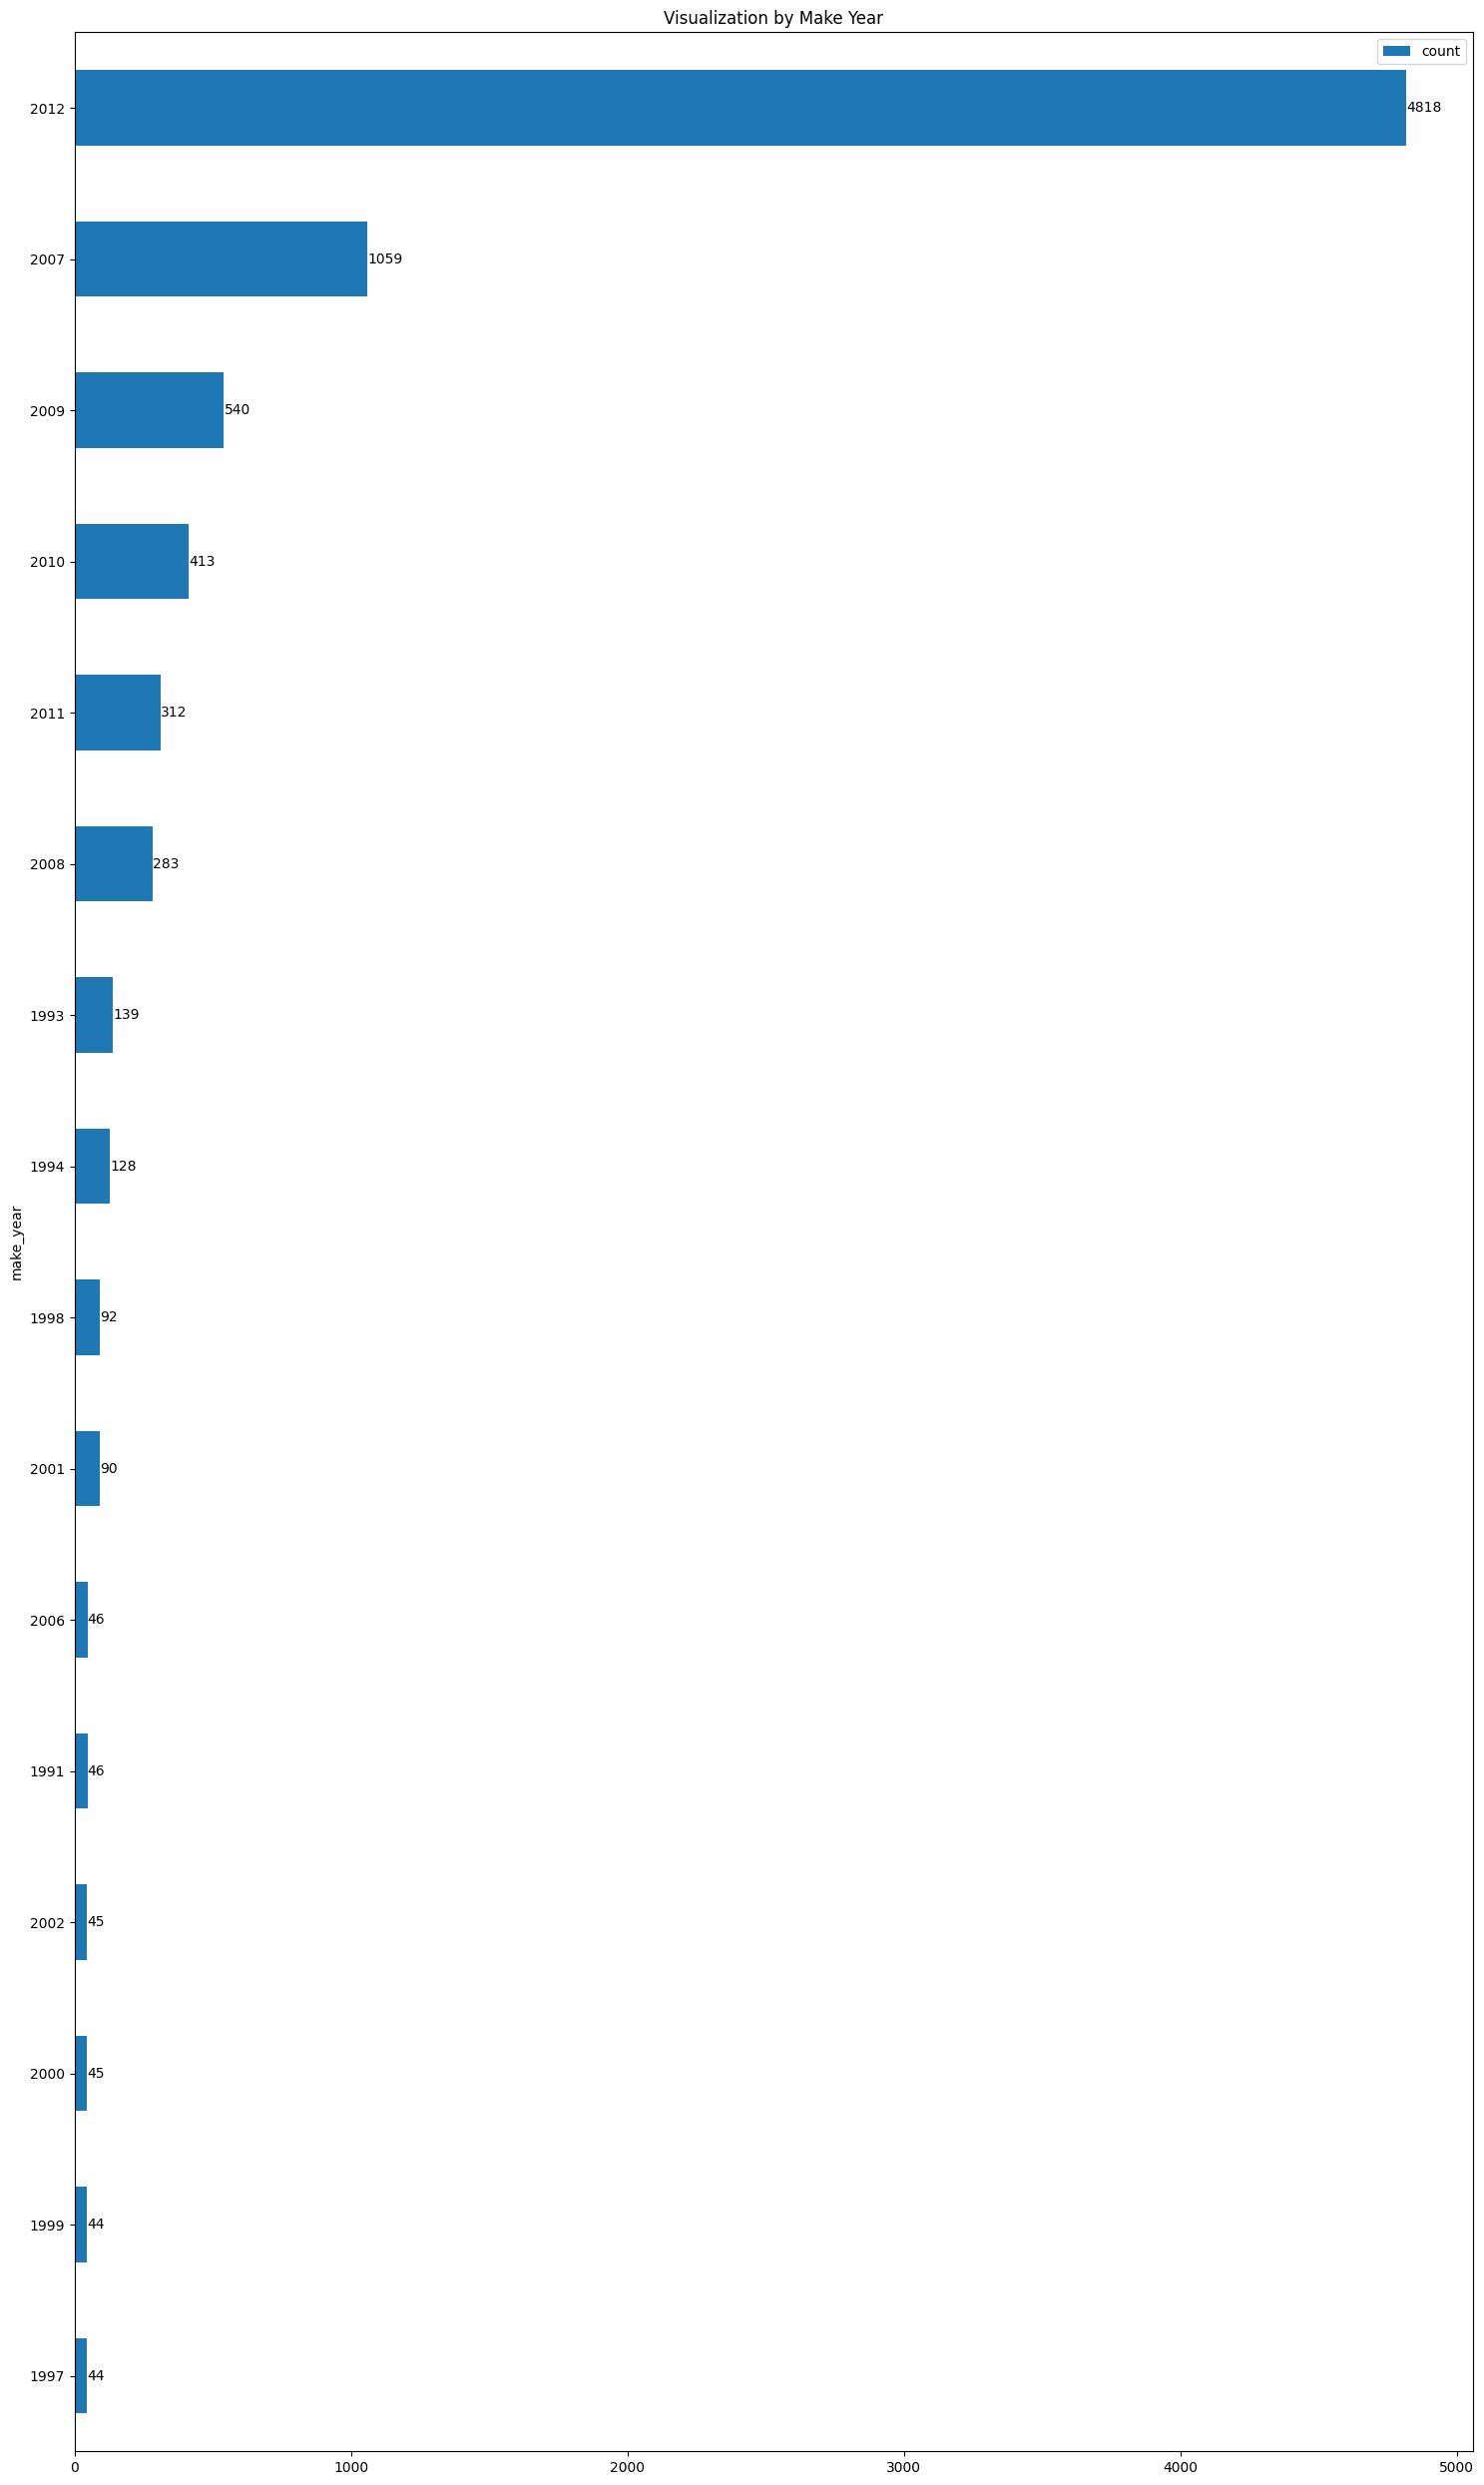

In [45]:
ax = merged_df1.make_year.value_counts().sort_values().plot(kind='barh', figsize=(15, 25),
                                                      title='Visualization by Make Year', legend=True)

ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

<b>Observations:</b>

>***Majority of the car models are from year 2012, 2007 and 2009***

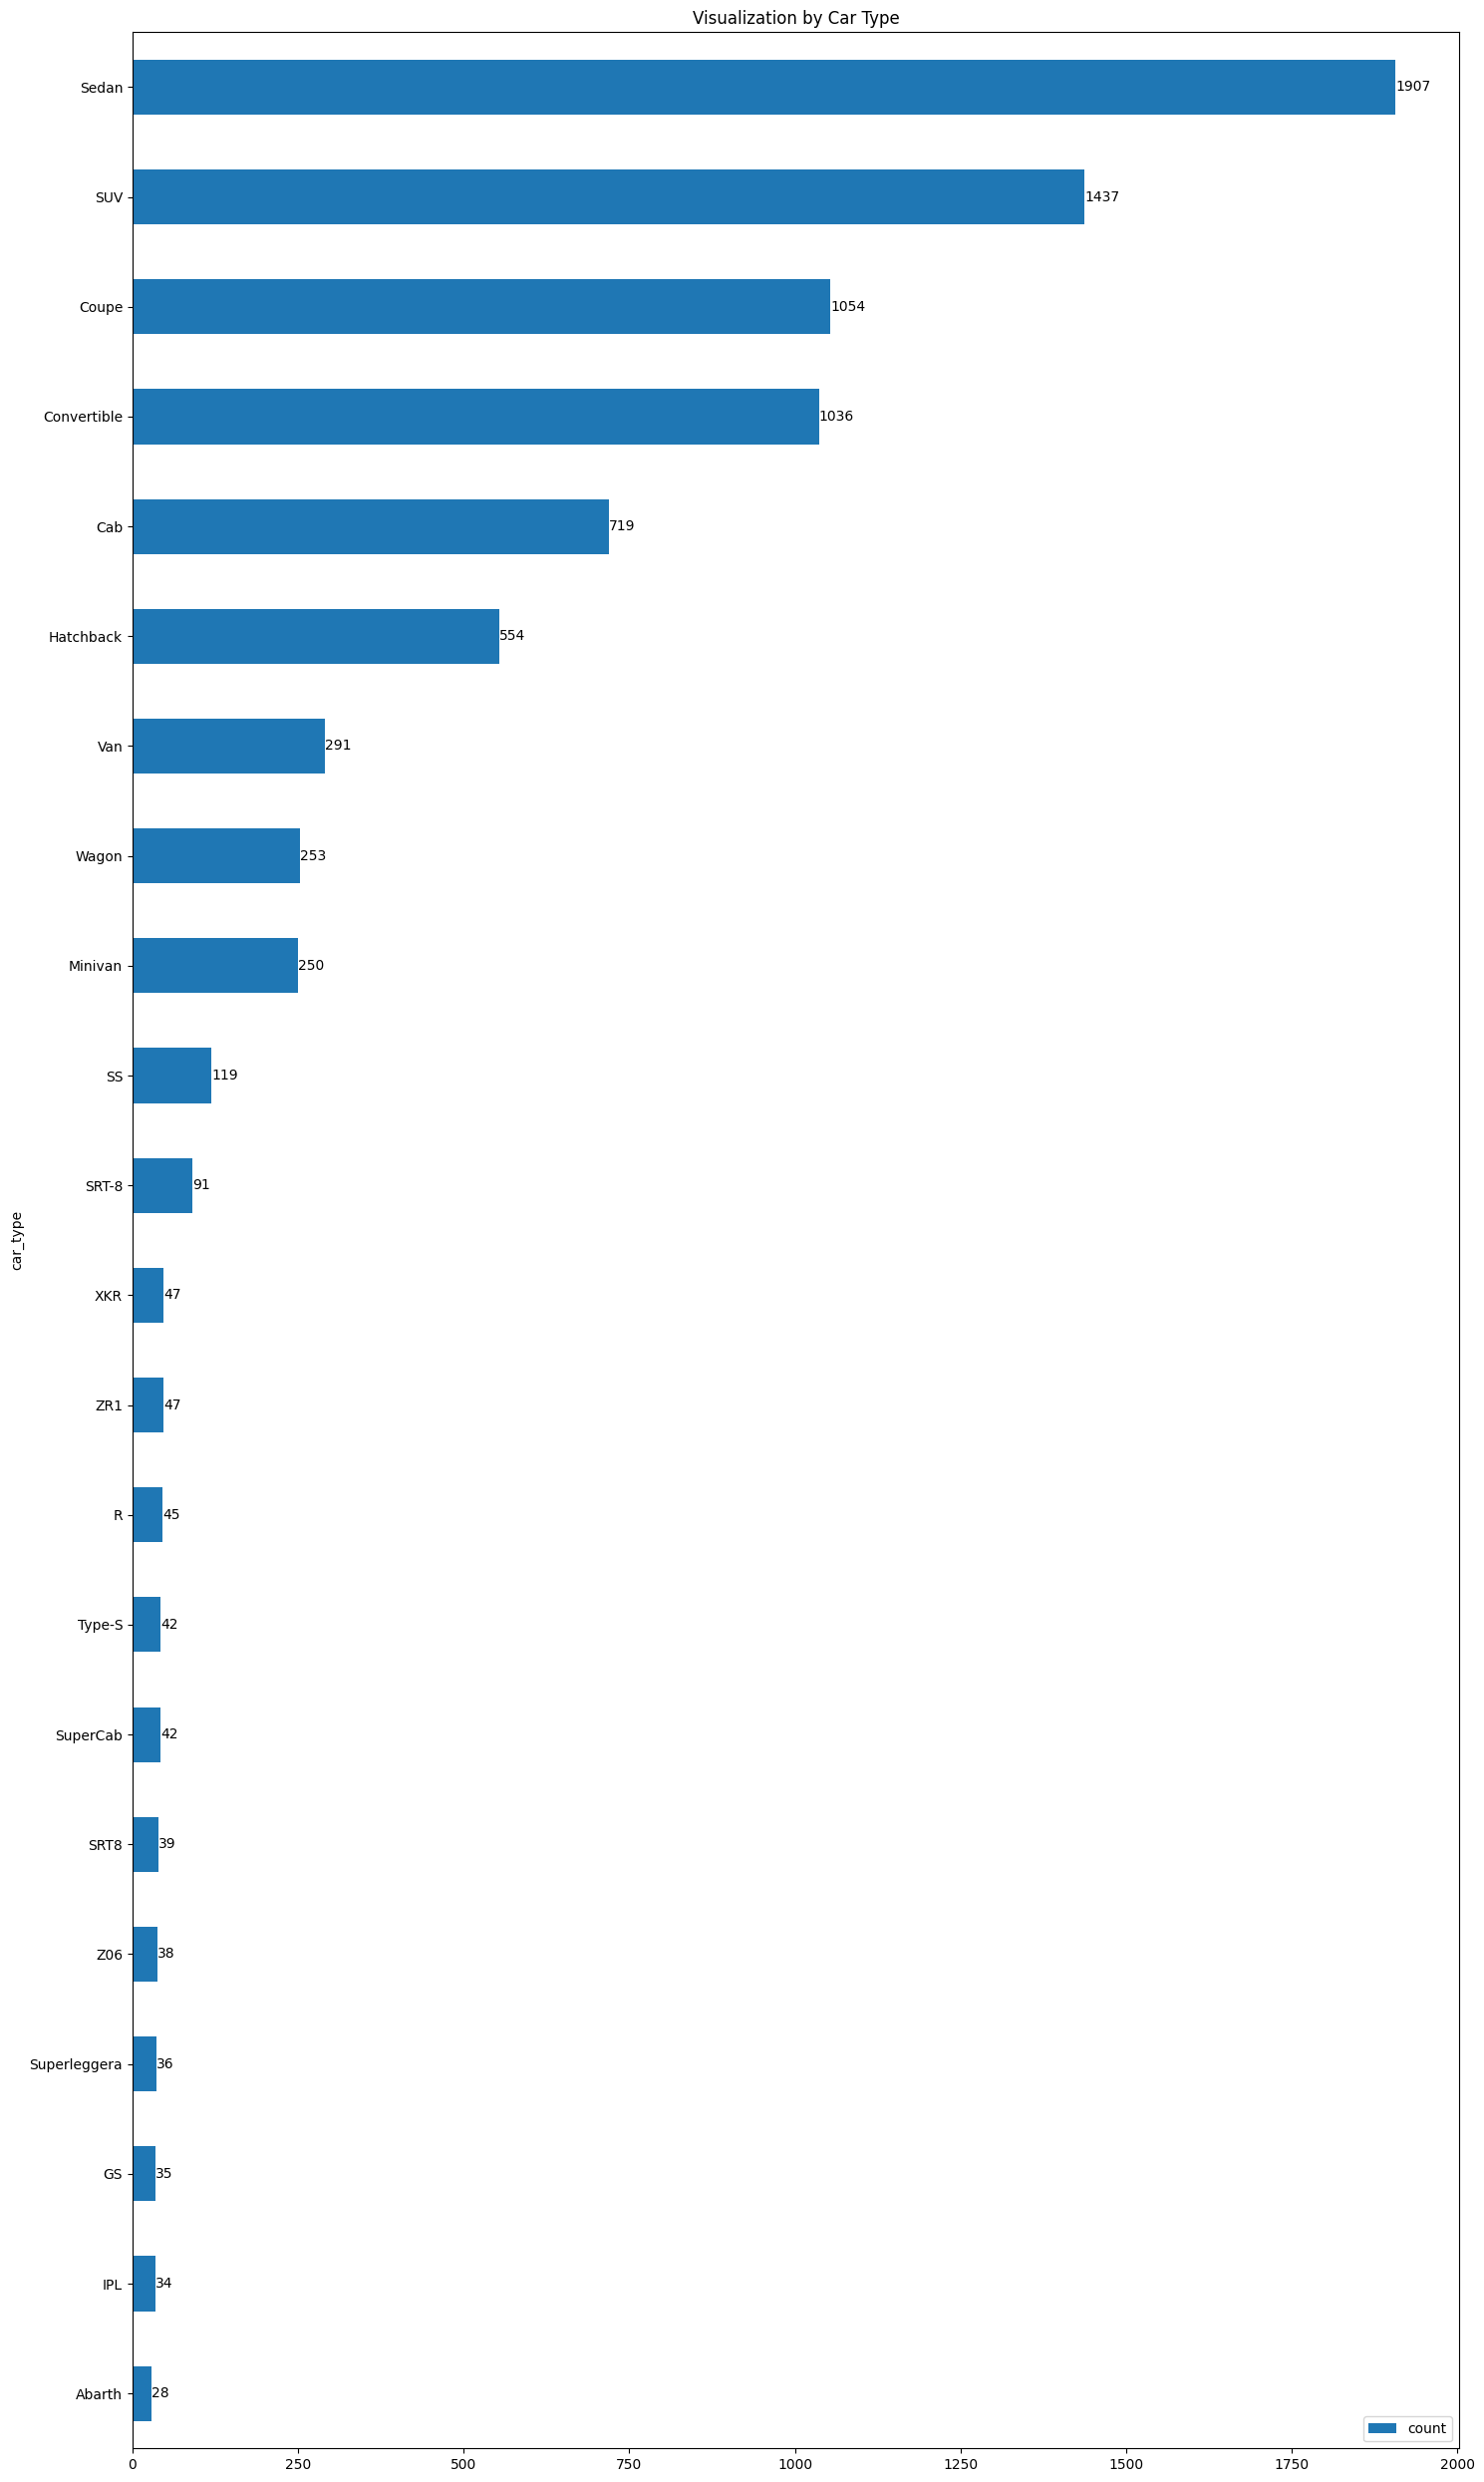

In [46]:
ax = merged_df1.car_type.value_counts().sort_values().plot(kind='barh', figsize=(15, 25),
                                                      title='Visualization by Car Type', legend=True)

ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

<b>Observations:</b>

>***Majority of the cars are Sedan, SUV, Coupe or Convertible***

<Axes: ylabel='Density'>

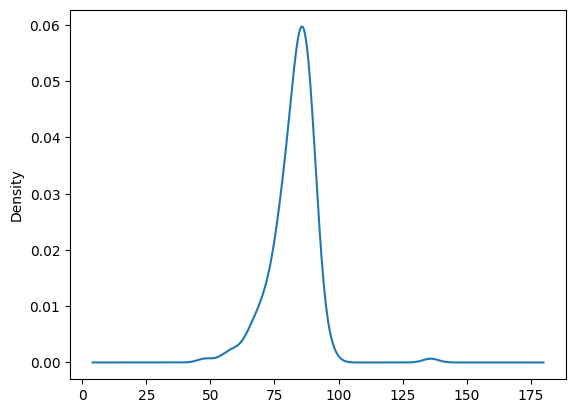

In [47]:
# Distribution of values as per class

merged_df1['Car Class'].value_counts().sort_values().plot(kind='kde')

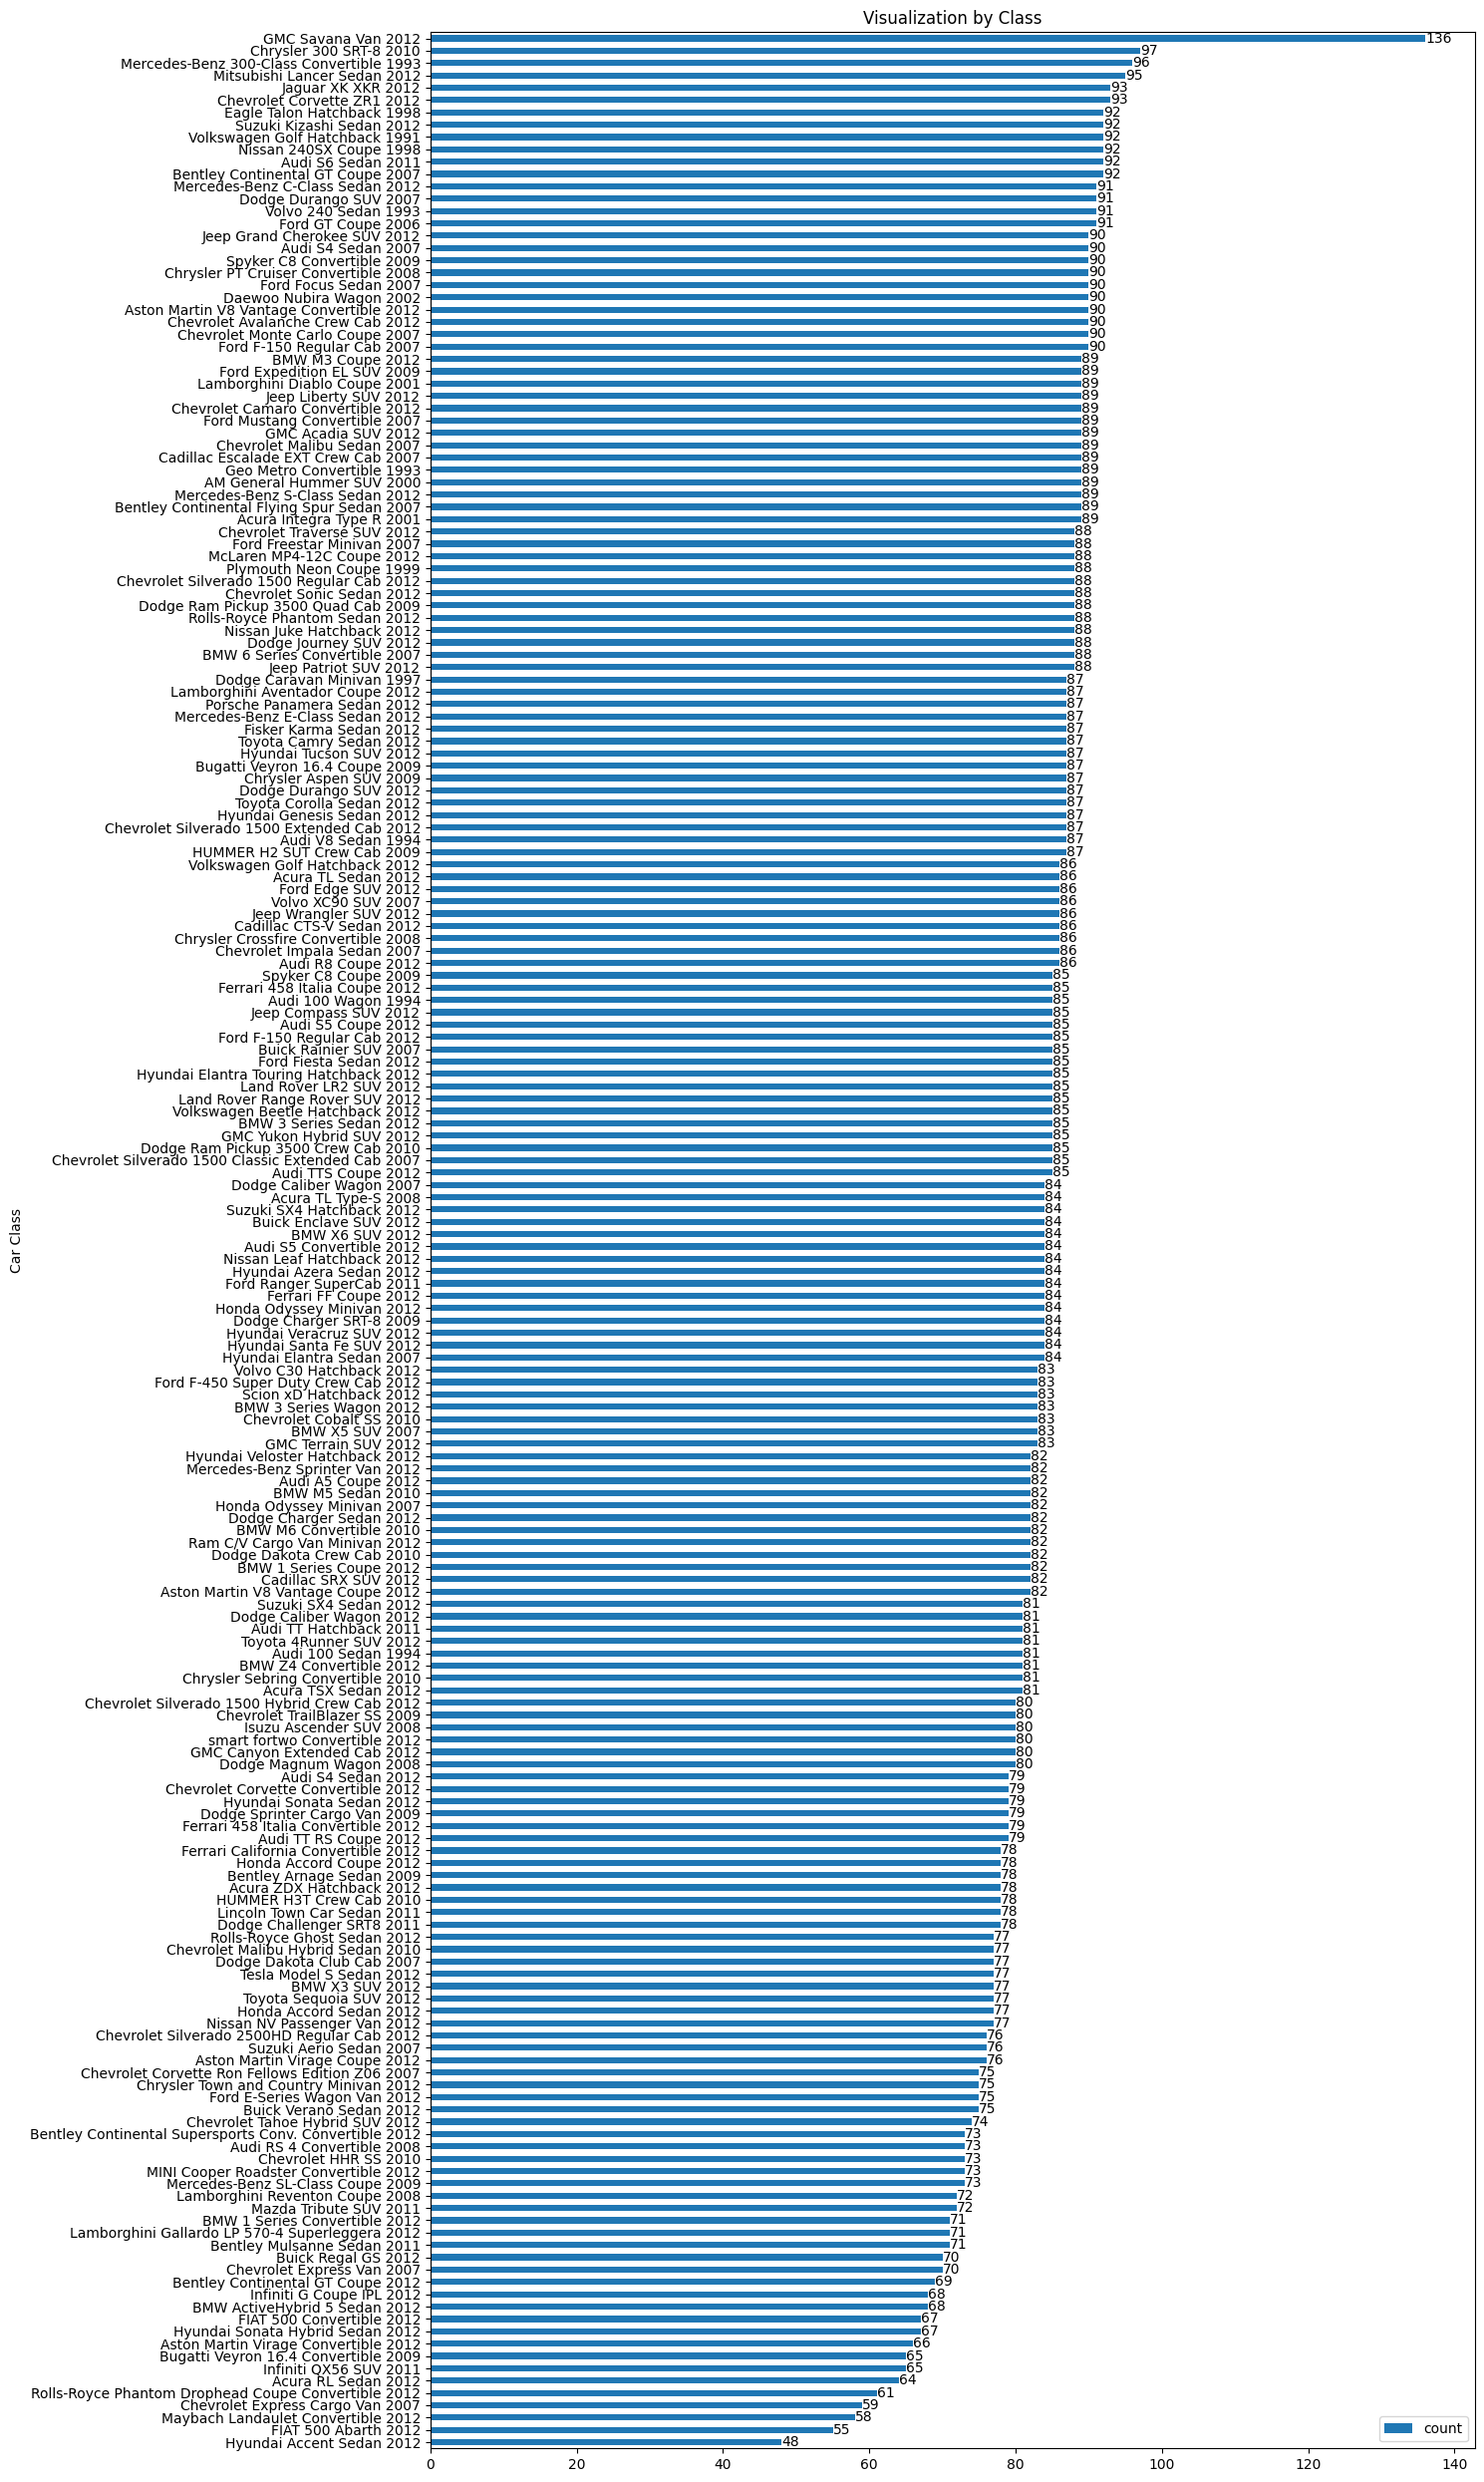

In [48]:
ax = merged_df1['Car Class'].value_counts().sort_values().plot(kind='barh', figsize=(15, 25),
                                                      title='Visualization by Class', legend=True)

ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

<b>Observations:</b>

>***Class 119 has maximum images (136) whereas Class 136 has the least (48)***

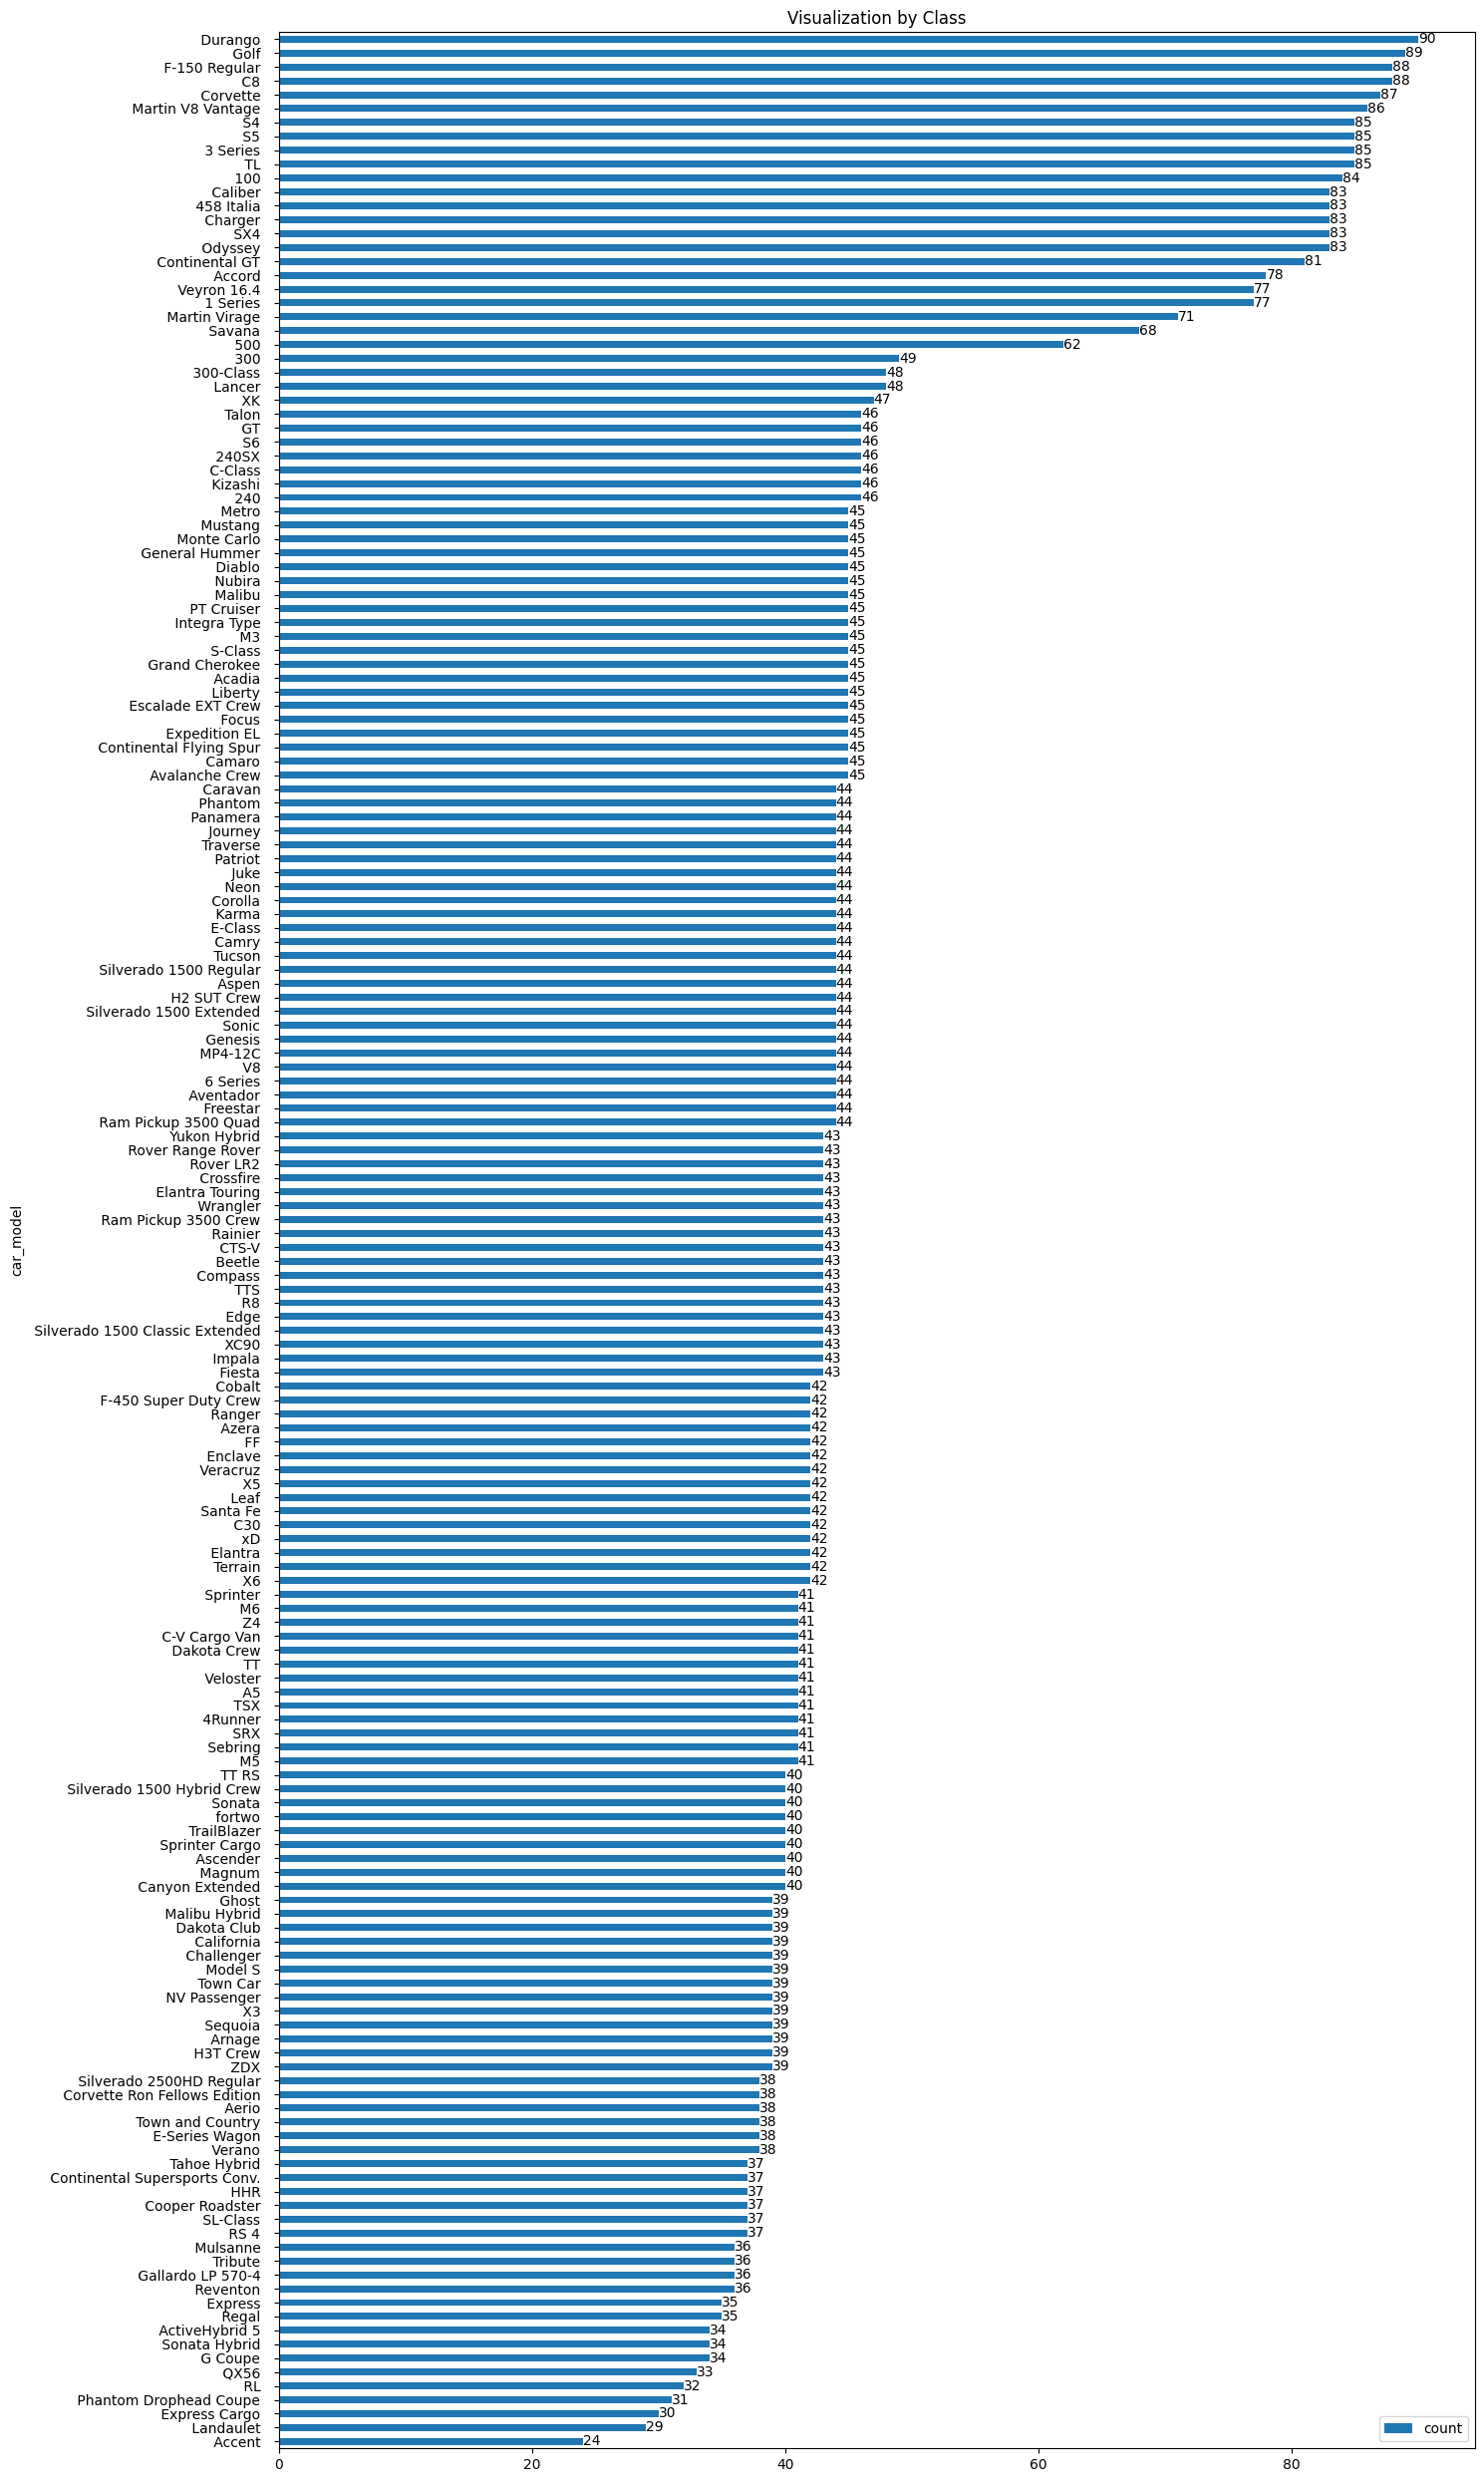

In [49]:
ax = merged_df1['car_model'].value_counts().sort_values().plot(kind='barh', figsize=(15, 25),
                                                      title='Visualization by Class', legend=True)

ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

In [50]:
from functools import reduce

def unique(list1): # Defining a function to get unqiue values from the list

    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

In [51]:
from functools import reduce

def unique(list1): # Defining a function to get unqiue values from the list

    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

print("The unique values from Test list is:")
# Check for typos and verify the correct column name
print(merged_df1.columns) # Print all column names to verify
# Replace "CorrectColumnName" with the actual column name from the output above
unique(merged_df1["Car Class"]) # Example: Assuming "Car Class" is the correct column name

The unique values from Test list is:
Index(['Image Name', 'X', 'Y', 'Width_x', 'Height_x', 'Image Class',
       'Car Class', 'Unnamed: 0', 'Label', 'File', 'ModelYear', 'car_Model',
       'Image_Name', 'xmin', 'ymin', 'xmax', 'ymax', 'Class', 'Height_y',
       'Width_y', 'imageAsArray', 'carName', 'imageName', 'carModel',
       'carModel_1', 'car_make', 'make_year', 'car_type', 'car_model'],
      dtype='object')
['Audi TTS Coupe 2012', 'Acura TL Sedan 2012', 'Dodge Dakota Club Cab 2007', 'Hyundai Sonata Hybrid Sedan 2012', 'Ford F-450 Super Duty Crew Cab 2012', 'Geo Metro Convertible 1993', 'Dodge Journey SUV 2012', 'Dodge Charger Sedan 2012', 'Mitsubishi Lancer Sedan 2012', 'Chevrolet Traverse SUV 2012', 'Buick Verano Sedan 2012', 'Toyota Sequoia SUV 2012', 'Hyundai Elantra Sedan 2007', 'Dodge Caravan Minivan 1997', 'Volvo C30 Hatchback 2012', 'Plymouth Neon Coupe 1999', 'Chevrolet Malibu Sedan 2007', 'Volkswagen Beetle Hatchback 2012', 'Chevrolet Corvette Ron Fellows Edition Z06

In [52]:
print("The unique values from Train list is:")

# Example list, replace with your actual data
train_image_shapes = [(100, 100), (200, 200), (100, 100)]

unique(train_image_shapes)

The unique values from Train list is:
[(100, 100), (200, 200)]


Index(['Image Name', 'X', 'Y', 'Width_x', 'Height_x', 'Image Class',
       'Car Class', 'Unnamed: 0', 'Label', 'File', 'ModelYear', 'car_Model',
       'Image_Name', 'xmin', 'ymin', 'xmax', 'ymax', 'Class', 'Height_y',
       'Width_y', 'imageAsArray', 'carName', 'imageName', 'carModel',
       'carModel_1', 'car_make', 'make_year', 'car_type', 'car_model'],
      dtype='object')
Column 'image_resolution' not found. Please check the column names.
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D

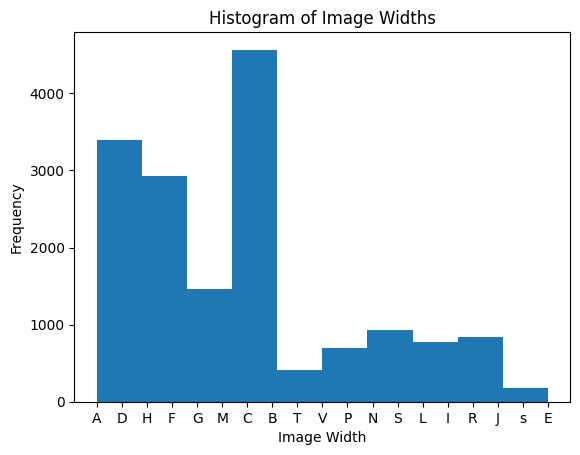

In [53]:
# Define histogram bins  based on width
# Check for typos and verify the correct column name
print(merged_df1.columns) # Print all column names to verify
# Replace "CorrectColumnName" with the actual column name from the output above
# For example, if the correct column name is 'image_resolution'
# Check if 'image_resolution' is in the column list, if not, replace with the correct name
if 'image_resolution' in merged_df1.columns:
    bin_width = [resolution[0] for resolution in merged_df1["image_resolution"]]
else:
    print("Column 'image_resolution' not found. Please check the column names.")
    # Replace 'CorrectColumnName' with the actual column name from the printed list
    correct_column_name =  'Car Class'
    bin_width = [resolution[0] for resolution in merged_df1[correct_column_name]]

# Changed column name to 'image_resolution'
print(bin_width)
# Create histogram data
# If bin_width is a Series (from value_counts), adjust plotting
if isinstance(bin_width, pd.Series):
    bin_width.plot(kind='bar')
    plt.xlabel(correct_column_name)
    plt.ylabel('Count')
    plt.title('Distribution of Car Classes')
else:
    histogram, bin_edges, _ = plt.hist(bin_width)  # Unpack into three variables to handle potential patches return
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title('Histogram of Image Widths')

plt.show()

<b>Observation:</b>

>***From the above we can conclude that there are images are color with 3 channels and greyscale images with 2 channels, we also see that majority are low resolution images***

In [54]:
# Displaying the test bar plot for images

# This is a list of unique values appearing in the input list
#lii_unique = list(set(test_image_shapes))

# This is the corresponding count for each value
#counts = [test_image_shapes.count(value) for value in lii_unique]

#barcontainer = plt.bar(lii_unique,counts)

# Some labels and formatting to look more like the example
#plt.bar_label(barcontainer,counts, label_type='edge')
#plt.axis('on')
#plt.show()

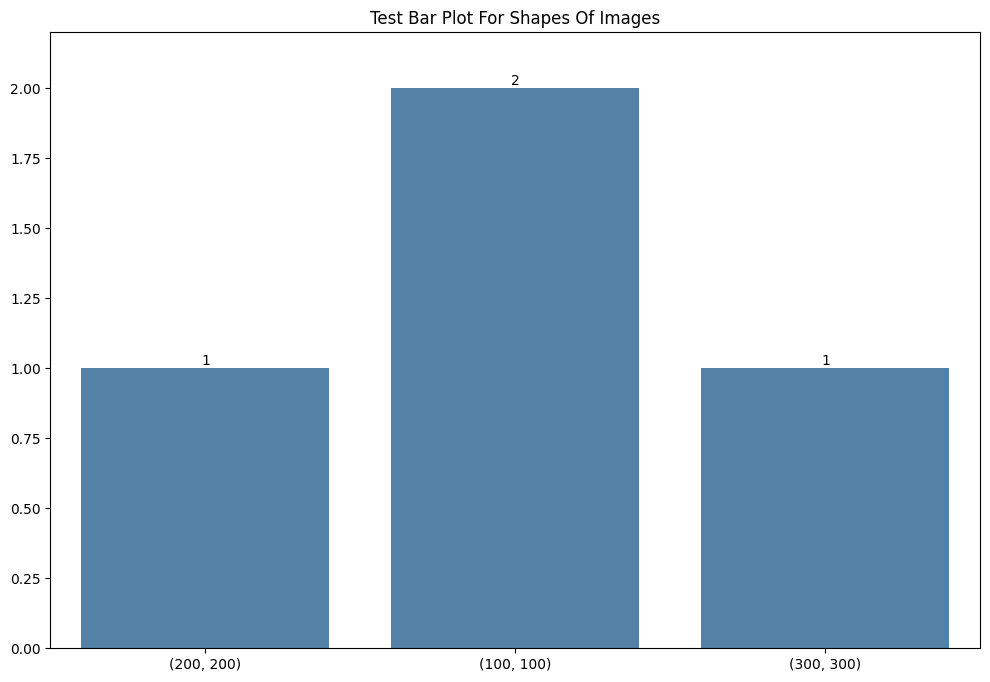

In [55]:
# Displaying the test bar plot for images

# Define test_image_shapes here with your actual data
test_image_shapes = [(100, 100), (200, 200), (100, 100), (300, 300)]

# This is a list of unique values appearing in the input list
lii_unique = list(set(test_image_shapes))

# Convert tuples to strings for plotting
lii_unique_str = [str(x) for x in lii_unique] # Convert tuples to strings

# This is the corresponding count for each value
counts = [test_image_shapes.count(value) for value in lii_unique]

# plot data
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=lii_unique_str, y=counts, ax=ax, color='steelblue').set(title='Test Bar Plot For Shapes Of Images') # Use string representation

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

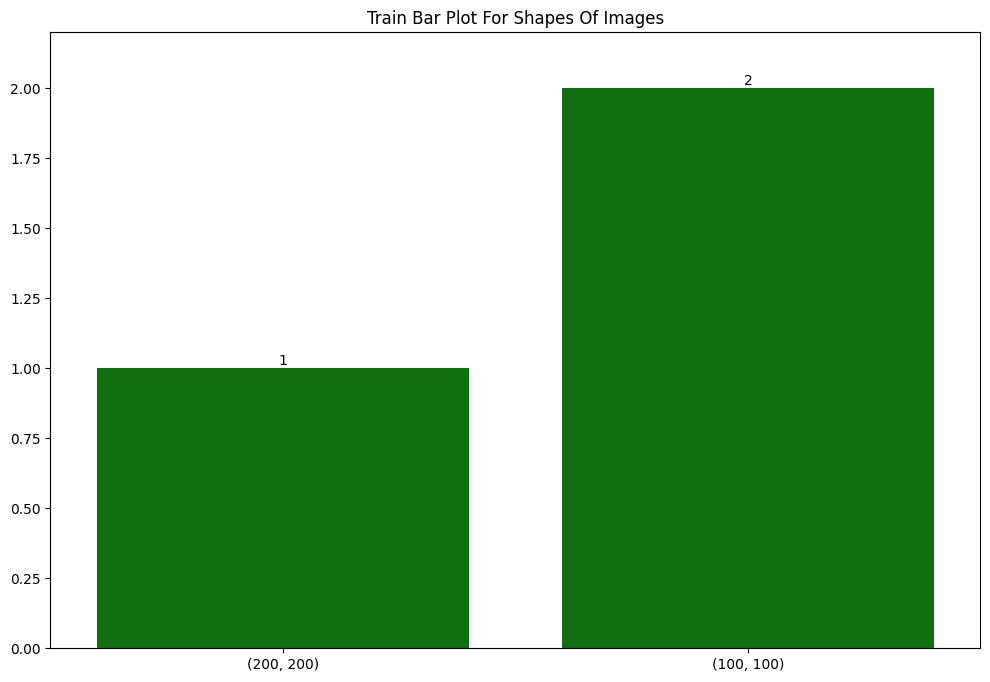

In [56]:
# Displaying the train bar plot for images

# This is a list of unique values appearing in the input list
lii_unique1 = list(set(train_image_shapes))

# Convert tuples to strings for plotting
lii_unique1_str = [str(x) for x in lii_unique1]  # Convert tuples to strings

# This is the corresponding count for each value
counts1 = [train_image_shapes.count(value) for value in lii_unique1]

# plot data
fig, ax = plt.subplots(figsize=(12, 8))
# Use string representation for x-axis
sns.barplot(x=lii_unique1_str, y=counts1, ax=ax, color='green').set(title='Train Bar Plot For Shapes Of Images')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

<b>Observation:</b>

>***From the above we can conclude that there are 16 greyscale images under the testing set and 18 greyscale images in the training set***

### Step 7:  (Step 2 in Milestone 2) Design, train RCNN models for bounding box and mask over area of interest

In [57]:
#Design,  train  and  test  RCNN  &  its  hybrids  based  object  detection  models  to  impose  the  bounding  box  or mask over the area of interest
# Calling this C Series of models
# First Lets start with a simple "out of the box" prediction based on RCNN ResNet-50 (Labeled C1)

#### Step 7-C1:  RCNN Resnet out of the box prediction (Works)

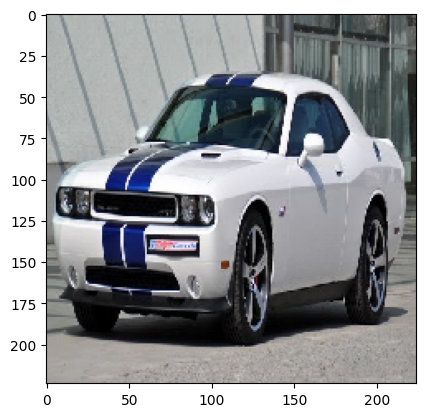

In [58]:
#Get first batch of images
imgs, labels = next(train_images)
#select a random image for prediction
plt.imshow(imgs[1])

In [59]:
#reference: https://learnopencv.com/faster-r-cnn-object-detection-with-pytorch/
import torchvision
import torchvision.transforms as T
model_c1 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_c1.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 111MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [60]:
COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [61]:
def get_prediction(img_path, threshold):
  """
  get_prediction
    parameters:
      - img_path - input image
      - threshold - threshold value for prediction score
    method:
      - the image is converted to image tensor using PyTorch's Transforms
      - image is passed through the model to get the predictions
      - class, box coordinates are obtained, but only prediction score > threshold
        are chosen.

  """
  img = img_path
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  # passing to the model for prediction
  pred = model_c1([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [62]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1, text_th=3):
  boxes, pred_cls = get_prediction(img_path, threshold)
  print(boxes)
  print(len(boxes))
  print(pred_cls)
  # Get predictions
  img = img_path
  # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Convert to RGB
  for i in range(len(boxes)):
    #Converting floating point predictions to int to help in plotting the same
    int_tuple_c1 = tuple(int(x) for x in boxes[i][0])
    int_tuple_c2 = tuple(int(x) for x in boxes[i][1])
    cv2.rectangle(img, int_tuple_c1, int_tuple_c2,color=(0, 255, 0), thickness=rect_th)
    # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], int_tuple_c1, cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
    # Write the prediction class
    plt.figure(figsize=(5,5))
    # display the output image
    plt.imshow(img)

[[(1.9704676, 35.024338), (214.2718, 198.96754)]]
1
['car']


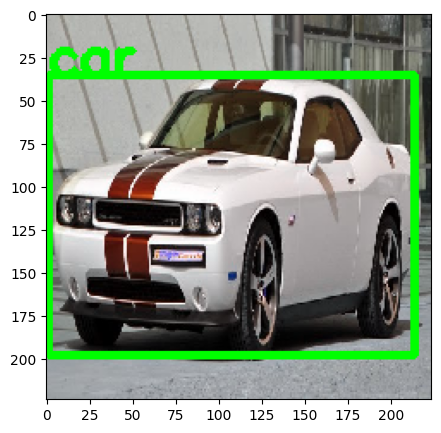

In [63]:
#Testing RCNN Restnet model
object_detection_api(imgs[1], threshold=0.8)

In [64]:
# Model has successfully detected the car as truck

#### Step 7-C2:  RCNN Resnet custom prediction ( Facing some error while passing num classes)

In [65]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Choose a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)

In [66]:
import torch.nn as nn

# Define custom loss functions for bounding box regression and classification
box_loss = nn.MSELoss()
cls_loss = nn.CrossEntropyLoss()

In [67]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
import torch.optim as optim
from torch.optim import lr_scheduler


# Define a custom dataset class, DataLoader, and transformations
# Define a custom dataset class, DataLoader, and transformations
class CustomCarDataset(ImageFolder):
    def __init__(self, root, transform=None, target_transform=None):
        super().__init__(root, transform=transform, target_transform=target_transform)

    def __getitem__(self, index):
        # Load image and target as usual
        img, target = super().__getitem__(index)

        # Ensure target is a dictionary with 'boxes' key
        if not isinstance(target, dict):
            target = {'boxes': torch.tensor([]), 'labels': torch.tensor([])}  # Or handle the case as needed

        # Check if 'boxes' is empty and handle it (e.g., skip the image)
        if target['boxes'].shape[0] == 0:
            # Handle empty boxes, e.g., print a warning or skip the image
            print(f"Warning: Image at index {index} has no bounding boxes. Skipping...")
            return None  # Return None to signal that this item should be skipped

        return img, target
# Define data transformations for training and testing
train_transform = T.Compose([
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(0.5),
    T.ToTensor(),
])

test_transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
])

# Create custom datasets and data loaders
train_dataset = CustomCarDataset(root=data_dir + '/Car Images/Train Images', transform=train_transform)
test_dataset = CustomCarDataset(root=data_dir + '/Car Images/Test Images', transform=test_transform)

# Use a custom collate function for the test_dataloader
def collate_fn(batch):
    # Filter out None values from the batch
    batch = [item for item in batch if item is not None]
    if not batch: # Handle the case where the batch is empty after filtering
        return [], [] # Return empty lists for images and targets
    return torch.utils.data.dataloader.default_collate(batch)


train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)
# ... (rest of the code remains unchanged)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn)



# Create a Faster R-CNN model with a ResNet-50 backbone
def create_model(num_classes):
    # Load a pre-trained ResNet-50 model
    backbone = torchvision.models.resnet50(pretrained=True)

    # Modify the final classification layer for the number of classes in your dataset
    in_features = backbone.fc.in_features
    backbone.fc = torch.nn.Linear(in_features, num_classes)
    out_channels = backbone.fc.in_features

    # Add the out_channels attribute to the backbone
    backbone.out_channels = out_channels
    # Set the out_channels attribute for FasterRCNN


    # Create an anchor generator
    rpn_anchor_generator = AnchorGenerator(
        sizes=((32, 64, 128, 256),),
        aspect_ratios=((0.5, 1.0, 2.0),)
    )

    # Initialize the Faster R-CNN model with the backbone, anchor generator and num_classes
    model = FasterRCNN(backbone, num_classes=num_classes, rpn_anchor_generator=rpn_anchor_generator) # Pass num_classes to FasterRCNN
    return model

# Create the model
car_detection_model = create_model(196)


# Define optimizer and learning rate scheduler
import torch.optim as optim
from torch.optim import lr_scheduler

optimizer = optim.SGD(car_detection_model.parameters(), lr=0.001, momentum=0.9)
# Use a specific learning rate scheduler class, e.g., StepLR
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Adjust step_size and gamma as needed



# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    car_detection_model.train()
    for images, targets in train_dataloader:
         # Check if the batch is None and skip it
        if images is None or targets is None:
            continue
        # Filter out None values from the batch
        valid_indices = [i for i, (img, tgt) in enumerate(zip(images, targets)) if img is not None and tgt is not None]
        if not valid_indices:  # Skip the batch if all items are None
            continue

        images = [images[i] for i in valid_indices]
        targets = [targets[i] for i in valid_indices]

        optimizer.zero_grad()
        images = list(img for img in images)
         # Convert target tensors to lists of dictionaries if necessary
        if isinstance(targets, torch.Tensor):
            targets = [{'boxes': targets[i]} for i in range(targets.shape[0])]  # Assuming targets is a tensor of bounding boxes
        loss_dict = car_detection_model(images, targets)
 # Use car_detection_model instead of model

        # Compute the total loss for backpropagation
        total_loss = sum(loss for loss in loss_dict.values())

        # Backpropagation and optimization
        total_loss.backward()
        optimizer.step()

    # Learning rate scheduler step
    scheduler.step()

# Save the trained model
torch.save(car_detection_model.state_dict(), 'car_detection_model.pth')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































#### Step 7-C3:  RCNN Resnet custom prediction ( This seems to work, just needs more memory)

In [68]:
#Refined architecture of Resnet - giving better accuracies
import torchvision.models as models
import torch.optim as optim
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [69]:
# to transform input data

data_transforms = {
    '/Car Images/Train Images': transforms.Compose([
        transforms.Resize((256, 256)),  #This transformation resizes the input images to have a height and width of 256 pixels.
        transforms.RandomHorizontalFlip(), #This transformation randomly flips the images horizontally with a 50% probability. Horizontal flipping is a common data augmentation technique that helps increase the diversity of the training data.
        transforms.RandomRotation(15), #This transformation randomly rotates the images by a maximum of 15 degrees.
        transforms.ToTensor(), #This transformation converts the images into PyTorch tensors.
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    '/Car Images/Test Images': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}
''' In this page (https://pytorch.org/vision/stable/models.html), it says that "All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1]
and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]"'''
# These values are derived form Imagenet based on mean and standard deviation of millions of images
# These values are commonly used for normalization when working with image data in deep learning, and they come from a widely used dataset called ImageNet

batch_size = 32

image_datasets = {x: torchvision.datasets.ImageFolder(root=data_dir +x, transform=data_transforms[x])
                  for x in ['/Car Images/Train Images', '/Car Images/Test Images']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
              for x in ['/Car Images/Train Images', '/Car Images/Test Images']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['/Car Images/Train Images', '/Car Images/Test Images']}
class_names = image_datasets['/Car Images/Train Images'].classes

In [70]:
dataset_sizes

{'/Car Images/Train Images': 8279, '/Car Images/Test Images': 8084}

In [71]:
model_c3 = models.resnet34(pretrained=True)
num_ftrs = model_c3.fc.in_features

model_c3.fc = nn.Linear(num_ftrs, 196)
model_c3 = model_c3.to(device)
model_c3.summary()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_c3.parameters(), lr=0.01, momentum=0.9)
#This is an optional learning rate scheduler that adjusts the learning rate during training (e.g., learning rate decay).
lrscheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 67.4MB/s]


In [72]:
data_dir +  '/Car Images/Train Images'

'/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Train Images'

In [73]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):
    #Four lists (losses, accuracies, test_accuracies, and test_losses) are initialized to store training and testing metrics over epochs.
    losses = []
    accuracies = []
    test_accuracies = []
    test_losses = []
    #The model is moved to the specified device, which is presumably either a CPU or GPU.
    model.to(device)
    model.train()
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}/{n_epochs-1}')
        print('-' * 10)
        running_loss = 0.0
        running_correct = 0.0
        total = 0.0
        #For each epoch, it prints the epoch number and enters a loop that iterates over two phases: "train" and "test".
        for phase in ['/Car Images/Train Images', '/Car Images/Test Images']:
            if phase == '/Car Images/Train Images':
                model.train() #In the "train" phase, the model is set to training mode (model.train()), and the training data is used to update the model's parameters.
            else:
                model.eval() #In the "test" phase, the model is set to evaluation mode (model.eval()), and the testing data is used to evaluate the model's performance without updating its parameters.

            running_loss = 0.0
            running_corrects = 0
            #For each phase (either "train" or "test"), the code loops over the data in batches using the dataloaders dictionary.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                # we perform forward pass, calculate the loss, and compute predictions.
                with torch.set_grad_enabled(phase == '/Car Images/Train Images'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    #For train phase,we also perform backpropagation and updates the model's parameters using the optimizer.
                    if phase == '/Car Images/Train Images':
                        loss.backward()
                        optimizer.step()
                #Running loss and accuracy metrics are computed for each phase.
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            #If the phase is "train," the learning rate scheduler (scheduler) is optionally stepped to adjust the learning rate.
            if phase == '/Car Images/Train Images':
                scheduler.step()
            #At the end of each epoch, the average loss and accuracy for both the "train" and "test" phases are calculated.
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            #These metrics are appended to the respective lists (losses, accuracies, test_losses, test_accuracies).
            if phase == '/Car Images/Train Images':
                losses.append(epoch_loss)
                accuracies.append(epoch_acc)
            else:
                test_losses.append(epoch_loss)
                test_accuracies.append(epoch_acc)
            #The metrics for both phases are printed.
            print(f'{phase} Loss: {epoch_loss} Acc: {epoch_acc}')
        print()

    return model, losses, accuracies, test_losses, test_accuracies

In [74]:
def visual(training_losses, training_accs, test_losses, test_accs, name):

    f, ax = plt.subplots(2,2, figsize = (12, 8))
    ax[0, 0].plot(training_losses)
    ax[0, 0].set_title("Training loss")
    ax[0, 1].plot(training_accs)
    ax[0, 1].set_title("Training acc")
    ax[1, 0].plot(test_losses)
    ax[1, 0].set_title("Test loss")
    ax[1, 1].plot(test_accs)
    ax[1, 1].set_title("Test acc")
    f.suptitle(f'Train visualise {name} 100\'s of batches')
    plt.show()

In [75]:
print(f'#### Fine-Tuning Model ####')
model_c3, training_losses, training_accs, test_losses, test_accs = train_model(model_c3, criterion, optimizer, lrscheduler, n_epochs=5)
visual(training_losses, training_accs, test_losses, test_accs, 'NN Fine-Tuning Model')

#### Fine-Tuning Model ####
Epoch 0/4
----------
/Car Images/Train Images Loss: 3.823921334111384 Acc: 0.17441720014494505


KeyboardInterrupt: 

#### Step 7-D1:  Trying newer architectures e.g. YOLO Version 8 from Ultralytics

In [76]:
# Run 3 - trying with YOLO
!pip install ultralytics

In [78]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
#model.summary()

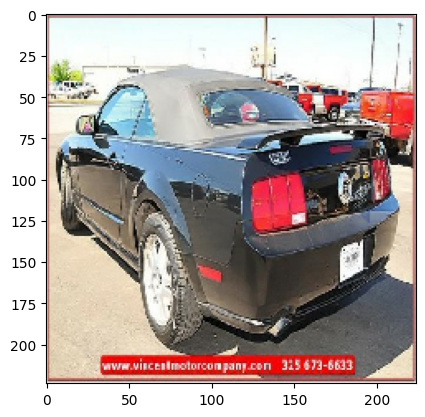

In [79]:
#import a random image
imgs, labels = next(train_images)
plt.imshow(imgs[1])

In [80]:
img = imgs[1]
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

print(height, width, channels)

224 224 3


In [81]:
#do not understand why nothing is detected with YoLO!
results = model.predict(img)


0: 640x640 (no detections), 390.5ms
Speed: 113.6ms preprocess, 390.5ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)


In [82]:
# Access the first element of the results list, assuming it contains the result object
result = results[0]

# Now you can access the names attribute
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [83]:
#reference: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
#reference: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
result = results[0]
print("No. of objects detected", len(result.boxes))

# Check if any boxes were detected before iterating
if result.boxes:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")
else:
    print("No objects detected in the image.")

No. of objects detected 0
No objects detected in the image.


#### Step 7-D2:  Trying newer architectures e.g. Mobilenet (again ran into some error)

In [84]:
#Attempt 4 - trying mobilenet model
#reference: https://github.com/prakhargurawa/Vehicle-Detection-Classification-YOLO-MobileNet/blob/main/MobileNet_TransferLearning.py
from keras.applications import MobileNetV2
# Reference : https://analyticsindiamag.com/a-practical-guide-to-implement-transfer-learning-in-tensorflow/
base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(192, 192, 3))  # imports the mobilenet model and discards the last 1000 neuron layer.
# Freeze the base model
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
        base_model,
        #Dense(512, activation='relu',kernel_regularizer='l1'),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(196, activation='softmax')
])

In [ ]:
# Unfreeze the new layers
for layer in model.layers[0:]:
    layer.trainable =  True

print("************************ LAYERS ************************")
for layer in model.layers:
    print(layer.name,layer.trainable)
print("********************************************************")

print(model.summary())

# Reference : https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

In [ ]:
import keras
import numpy as np
from keras.applications import MobileNetV2
from keras.layers import Dense, Flatten,Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,validation_split=0.2,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        data_dir + '/Car Images/Train Images',
        target_size=(192,192),
        batch_size=64,
        class_mode='categorical',
        subset='training',
        shuffle=True)

validation_generator = train_datagen.flow_from_directory(
        data_dir +  '/Car Images/Test Images',
        target_size=(192, 192),
        batch_size=64,
        class_mode='categorical',
        subset='validation',
        shuffle=True)

In [ ]:
# Selection of optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e
# Adam is the best among the adaptive optimizers in most of the cases.

# Adam optimizer,loss function will be binary cross entropy,evaluation metric will be accuracy
algo = "Adam"
model.compile(optimizer = keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=validation_generator.n//validation_generator.batch_size
ep = 20

In [ ]:
# Check the number of classes in your dataset
# Check the number of classes in your dataset
num_classes = train_generator.num_classes

# Modify the last layer of your model (assuming it's a Sequential model)
model.layers[-1].units = num_classes  # Set the number of output units to match the number of classes
model.layers[-1].activation = tf.keras.activations.softmax # Use softmax for categorical classification

# Add a Flatten layer before the final Dense layer if there's an extra dimension
if len(model.layers[-1].input_shape) > 2:  # Check if there's an extra dimension (e.g., from convolutional layers)
    model.add(tf.keras.layers.Flatten()) # Flatten the output before the final Dense layer

# Recompile the model with the updated output layer
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),  # Use CategoricalCrossentropy without from_logits=True for softmax output
              metrics=['accuracy'])

# Now try fitting the model again
history = model.fit(x=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=validation_generator,
                   validation_steps=step_size_val,
                   epochs=ep)

### Step 6:   Fine tune the trained basic CNN models to classify the car

#### Step 6- Model A3:  Trying to predict on 196 classes using Data Generator (99 mn parameters) (Works, but takes too long and less accurate)

In [ ]:
#Attempt 1 - too many paramenters 99 mn - takes long to run, hence aborted
# define model
model = Sequential()
model.add(Conv2D(224, (3, 3), padding='same',input_shape=(224,224,3),activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(196, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])

STEP_SIZE_TRAIN=train_images.n//train_images.batch_size
STEP_SIZE_VALID=test_images.n//test_images.batch_size


In [ ]:
model.summary()

In [ ]:
# fit model - seems to run with Pillow update fix, but aborated as it was taking way too long
model.fit_generator(generator=train_images,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_images,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

In [ ]:
#not sure if this is the right way of training (alternate to above - anyway - this wasn't runnign and giving graph execution error)
history_n = model.fit(train_images, steps_per_epoch=len(train_images),
                            validation_data=test_images,
                        validation_steps=len(test_images), epochs=20)

#### Step 6- Model A4:  Trying to predict on 196 classes using Data Generator (23 mn parameters)

In [ ]:
#Attempt 2 - model with less parameters - 23 mn
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2), 2))
model.add(Flatten())
#model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(196, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
#Build the model with adam optimizer and categorical cross entropy loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN=train_images.n//train_images.batch_size
STEP_SIZE_VALID=test_images.n//test_images.batch_size

In [ ]:
#yet to try and run this
model.fit_generator(generator=train_images,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_images,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

In [ ]:
# Same error as model A3, gives rise to error after 1 epoch
history_n = model.fit(train_images, steps_per_epoch=len(train_images),
                            validation_data=test_images,
                        validation_steps=len(test_images), epochs=10)

#### Step 7 D1A - Other model experiments: Yolo with great learning code

In [ ]:
# Run 3 - trying with YOLO from Grear learning code
# https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/
# Giving some errror - didnt try to debug
# Load Yolo - GL code
print("LOADING YOLO")
net = cv2.dnn.readNet("yolov3.weights", "yolov31.cfg")
#save all the names in file o the list classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#get layers of the network
layer_names = net.getLayerNames()
#Determine the output layer names from the YOLO model
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

In [ ]:
# Capture frame-by-frame
#img = cv2.imread("test_img.jpg")
img = ims[0]
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),swapRB=True, crop=False)
#Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

#We use NMS function in opencv to perform Non-maximum Suppression
#we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,1/2, color, 2)

cv2.imshow("Image",img)
cv2.waitKey(0)

#### Step 7 D3 Other model experiments: Using GluonCV - does not support python 3.10

In [ ]:
!python -V

In [ ]:
import torch
print(torch.__version__)

# Note that some model code requires torch version < 1.9, but python 3.10 does not support torch models of this version

In [ ]:
#Attempt 5 - RCNN

!pip install gluoncv

In [ ]:
!pip install mxnet

In [ ]:
!pip install --upgrade Pillow
!pip install torch>=1.4.0,<2.0.0

In [ ]:
import mxnet as mx
import gluoncv
from google.colab.patches import cv2_imshow

In [ ]:
from gluoncv import model_zoo, data, utils
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

#### Step 7 C3 Other model experiments: Yet to try this RCNN code variant

In [ ]:
#Attempt 7
#reference https://www.kaggle.com/code/deepbear/pytorch-car-classifier-90-accuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import time
import os
import PIL.Image as Image
from IPython.display import display

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:


train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.ImageFolder(root=data_dir + data_dir_tmp + '/Car Images/Train Images', transform = train_tfms)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle=True, num_workers = 2)

dataset2 = torchvision.datasets.ImageFolder(root=data_dir + data_dir_tmp + '/Car Images/Test Images', transform = test_tfms)
testloader = torch.utils.data.DataLoader(dataset2, batch_size = 32, shuffle=False, num_workers = 2)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):

    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(trainloader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            #inputs = inputs.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100/32*running_correct/len(trainloader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))

        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)

        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
    since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies

In [ ]:
def eval_model(model):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            images = images.to(device)
            labels = labels.to(device)

            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (test_acc))
    return test_acc

In [ ]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features

# replace the last fc layer with an untrained one (requires grad by default)
model_ft.fc = nn.Linear(num_ftrs, 196)
model_ft = model_ft.to(device)

# uncomment this block for half precision model
"""
model_ft = model_ft.half()


for layer in model_ft.modules():
    if isinstance(layer, nn.BatchNorm2d):
        layer.float()
"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

"""
probably not the best metric to track, but we are tracking the training accuracy and measuring whether
it increases by atleast 0.9 per epoch and if it hasn't increased by 0.9 reduce the lr by 0.1x.
However in this model it did not benefit me.
"""
lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

In [ ]:
model_ft, training_losses, training_accs, test_accs = train_model(model_ft, criterion, optimizer, lrscheduler, n_epochs=10)

In [ ]:
f, axarr = plt.subplots(2,2, figsize = (12, 8))
axarr[0, 0].plot(training_losses)
axarr[0, 0].set_title("Training loss")
axarr[0, 1].plot(training_accs)
axarr[0, 1].set_title("Training acc")
axarr[1, 0].plot(test_accs)

axarr[1, 0].set_title("Test acc")

In [ ]:
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(dataset_dir+"train")

In [ ]:
# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model_ft.eval()

# transforms for the input image
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
image = Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg")
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
image = image.unsqueeze(0)
image = image.cuda()
output = model_ft(image)
conf, predicted = torch.max(output.data, 1)

In [ ]:
# get the class name of the prediction
display(Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg"))
print(classes[predicted.item()], "confidence: ", conf.item())

#### Other model experiments: From previous runs of Step 5

In [ ]:
def transform_classes(args):
    """
    data/0/ -> 0
    data/1/ -> 1
    data/2/ -> 1
    """
    new_classes = np.array([0,1,1])
    x,y = args
    y = np.argmax(y, axis=1) # One hot to integer
    y = new_classes[y] # Changing the target
    y = np.eye(2)[y] # Going back to one hot
    return x,y

train_generator = map(transform_classes, train_generator)

In [ ]:
# Creating train & test from their DataFrames

x_train = mapped_train['Image']
y_train = mapped_train['Class']
x_test = mapped_test['Image']
y_test = mapped_test['Class']

In [ ]:
# Resizing the images, converting the grey ones to color and storing them in training array

training = []
for i in x_train:
    color_img = i
    try:
        color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    except:
        training.append(cv2.resize(color_img,(200,200)))
        continue
    training.append(cv2.resize(color_img,(200,200)))

In [ ]:
training = np.asarray(training)

In [ ]:
training.shape

In [ ]:
plt.imshow(training[10])

In [ ]:
# Resizing the images, converting the grey ones to color and storing them in testing array

testing = []
for i in x_test:
    color_img = i
    try:
        color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    except:
        testing.append(cv2.resize(color_img,(200,200)))
        continue
    testing.append(cv2.resize(color_img,(200,200)))

In [ ]:
testing = np.asarray(testing)

In [ ]:
testing.shape

In [ ]:
plt.imshow(testing[10])

In [ ]:
# Sharpening and normalizing the train images

kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])

new_train = []
for i in training:
    sharpened = cv2.filter2D(i, -1, kernel)
    img_normalized = cv2.normalize(sharpened, None, 0, 255, cv2.NORM_MINMAX)
    new_train.append(img_normalized)

In [ ]:
new_train = np.asarray(new_train)

In [ ]:
new_train.shape

In [ ]:
plt.imshow(new_train[10])

In [ ]:
# Sharpening and normalizing the test images

new_test = []
for i in testing:
    sharpened = cv2.filter2D(i, -1, kernel)
    img_normalized = cv2.normalize(sharpened, None, 0, 255, cv2.NORM_MINMAX)
    new_test.append(img_normalized)

In [ ]:
new_test = np.asarray(new_test)

In [ ]:
new_test.shape

In [ ]:
plt.imshow(new_test[10])

In [ ]:
classes = np.unique(y_train)
classes

In [ ]:
class_labels = []
for c in classes:
    val = np.where(merged_df1['Class'].eq(c))[0][0]
    class_labels.append(merged_df1.iloc[val]['Label'])

In [ ]:
class_labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_new = lb.fit_transform(y_train)

#y_train_new = np_utils.to_categorical(y_train)

In [ ]:
y_train_new.shape

In [ ]:
y_test_new = lb.fit_transform(y_test)

In [ ]:
y_test_new.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
train_label = le.fit_transform(y_train)
train_label = to_categorical(train_label)

In [ ]:
train_label[0]

In [ ]:
test_label = le.fit_transform(y_test)
test_label = to_categorical(test_label)

In [ ]:
test_label[0]

In [ ]:
import gc

del merged_df1
del testing
del training
del merged_df
del new_df
del df_train_images
del df_test_images
del train_images
del test_images

gc.collect()

In [ ]:
new_train = np.expand_dims(new_train, axis=3)

In [ ]:
new_test = np.expand_dims(new_test, axis=3)

In [ ]:
def to_grayscale_then_rgb(image):
    #image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
new_train = new_train/255.0
new_test = new_test/255.0

In [ ]:
new_train[0]

In [ ]:
generator = ImageDataGenerator(rotation_range = 100,zoom_range = 0.1,width_shift_range = 0.1,
                               height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True
                               )
training_set = generator.flow(new_train,y_train,batch_size=32,seed=42,shuffle=True)
testing_set = generator.flow(new_test,y_test,batch_size=32,seed=42,shuffle=True)

In [ ]:
# Creating a base CNN model to test the model's performance

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2), 2))
model.add(Flatten())
#model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(196, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=20
history = model.fit(new_train,
                    y_train_new,
                    validation_data=(new_test,y_test_new),
                      steps_per_epoch=len(new_train) // 32,
                      epochs=epochs,
                      batch_size = 32
                     )

In [ ]:
#Model 2

In [ ]:
model2 = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(200, 200, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(196)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
arr = le.fit_transform(y_train)
arr1 = le.fit_transform(y_test)

In [ ]:
tr = to_categorical(y_train)
tst = to_categorical(y_test)

In [ ]:
len(tr)

In [ ]:
epochs=10
history1 = model2.fit(new_train,arr,
                    validation_data=(new_test,arr1),
                      #steps_per_epoch=len(new_train) // 32,
                      epochs=epochs,
                      batch_size = 32
                     )

In [ ]:
#Run till this point***

In [ ]:
img1 = mapped_train['Image'][40]
img1 = np.asarray(img1)
image_test = np.asarray(img1)

In [ ]:
plt.imshow(image_test)

In [ ]:
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(image_test, -1, kernel)

In [ ]:
plt.imshow(sharpened)

In [ ]:
X = mapped_train['X'][40]
Y = mapped_train['Y'][40]
W = mapped_train['Width'][40]
H = mapped_train['Height'][40]

In [ ]:
img_g = cv2.GaussianBlur(sharpened,(3,3),0)

In [ ]:
plt.imshow(img_g)

In [ ]:
# Resizing the image size to half ie., from 128X128 to 64X64
img_resized = cv2.resize(image_test,None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img_resized,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
plt.imshow(img_g)

In [ ]:
mask = np.zeros(sharpened.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (X,Y,W,H)

cv2.grabCut(sharpened,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

image_test1 = sharpened*mask2[:,:,np.newaxis]

plt.imshow(image_test1),plt.colorbar(),plt.show()

In [ ]:
mask[mask2 == 0] = 0
mask[mask2 == 255] = 1
mask = np.zeros(image_test1.shape[:2],np.uint8)

mask, bgdModel, fgdModel = cv2.grabCut(image_test1,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image_test2 = image_test1*mask[:,:,np.newaxis]
plt.imshow(image_test2),plt.colorbar(),plt.show()

In [ ]:
plt.imshow(image_test1)

In [ ]:
grey = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
plt.imshow(grey)

In [ ]:
# perform image thresholding
ret, thresh = cv2.threshold(grey, 20, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')

In [ ]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')

In [ ]:
fast = cv2.fastNlMeansDenoisingColored(image_test, None, 10, 10, 7, 15)

In [ ]:
plt.imshow(fast)

In [ ]:
norm_img = np.zeros((image_test.shape[0], image_test.shape[1]))
image_test = cv2.normalize(image_test, norm_img, 0, 255, cv2.NORM_MINMAX)

In [ ]:
plt.imshow(image_test)

In [ ]:
def deskew(image):
    co_ords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(co_ords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [ ]:
# Convert the frame to grayscale for edge detection
gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply Gaussian blur to reduce noise and smoothen edges
blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5)

In [ ]:
# Perform Canny edge detection
edges = cv2.Canny(blurred, 20, 200)

In [ ]:
plt.imshow(edges)

In [ ]:
contours, hierarchy = cv2.findContours(edges,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
imgn = cv2.drawContours(sharpened, contours, -1, (0, 255, 0), 3)

In [ ]:
plt.imshow(imgn)

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  # INPUT_SIZE = 1024
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.compat.v1.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width = image.shape[0]
    height = image.shape[1]
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    print(width, height)
    print("Resize Ratio - {}".format(resize_ratio))
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    print(target_size)
    # target_size = (width, height)
    resized_image = Image.fromarray(np.array(image, dtype=np.float32)).convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap


def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]


def vis_segmentation(image, seg_map):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  plt.show()


LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

In [ ]:
import tarfile
import tempfile
import tensorflow as tf
from six.moves import urllib

MODEL_NAME = 'mobilenetv2_coco_voctrainaug'  # @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug', 'xception_coco_voctrainval']_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
    'mobilenetv2_coco_voctrainaug':
        'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
    'mobilenetv2_coco_voctrainval':
        'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
    'xception_coco_voctrainaug':
        'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
    'xception_coco_voctrainval':
        'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
}
_TARBALL_NAME = 'deeplab_model.tar.gz'
model_dir = tempfile.mkdtemp()
tf.io.gfile.makedirs(model_dir)
download_path = os.path.join(model_dir, _TARBALL_NAME)
print('downloading model, this might take a while...')
urllib.request.urlretrieve('http://download.tensorflow.org/models/' + _MODEL_URLS[MODEL_NAME],
                   download_path)
print('download completed! loading DeepLab model...')
MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

In [ ]:
#global resized_im, seg_map
def run_visualization(image):
    try:
        #original_im = Image.open(IMAGE_NAME)
        original_im = image
    except IOError:
        print('Cannot retrieve image. Please check url: ' + url)
        returnprint('running deeplab on image')
        resized_im, seg_map = MODEL.run(original_im)
        vis_segmentation(resized_im, seg_map)
        return resized_im, seg_map

In [ ]:
resized_im, seg_map = MODEL.run(grey)

In [ ]:
import matplotlib.gridspec as gridspec

vis_segmentation(resized_im, seg_map)

In [ ]:
print(type(resized_im))
numpy_image = np.array(resized_im)

In [ ]:
from copy import deepcopy

person_not_person_mapping = deepcopy(numpy_image)
person_not_person_mapping[seg_map != 7] = 0
person_not_person_mapping[seg_map == 7] = 255

In [ ]:
plt.imshow(person_not_person_mapping)

In [ ]:
orig_imginal = np.array(sharpened)
mapping_resized = cv2.resize(person_not_person_mapping,
                             (sharpened.shape[1],
                              sharpened.shape[0]),
                              Image.ANTIALIAS)

In [ ]:
gray = cv2.cvtColor(mapping_resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray,(15,15),0)
ret3,thresholded_img = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresholded_img)

In [ ]:
# Perform Canny edge detection
canny = cv2.Canny(person_not_person_mapping, 20, 200)

In [ ]:
plt.imshow(canny)

In [ ]:
sharpened_image = cv2.Laplacian(sharpened, cv2.CV_64F)

In [ ]:
plt.imshow(sharpened_image)